# Forecasting with Time Series 

In [ ]:
# Load libraries
from warnings import filterwarnings
filterwarnings('ignore')


import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale 
from sklearn.model_selection import StratifiedKFold,KFold
import lightgbm as lgb,
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split,GridSearchCV


from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Data Preparation

- Variable Transformation
- Null Value Check
- Outlier Check
- Standardization
- Feature Engineering

In [221]:
data = pd.read_excel("click_pred_data.xlsx")

In [47]:
df = data.copy()

In [48]:
df.shape

(800268, 29)

In [49]:
df.sort_values(["log_date","bolge"],ascending=True,inplace=True)

# 1. Variable Transformation

## a. Type Transformation

In [50]:
df.dtypes

Id                       int64
trivago_id               int64
hotel_impr               int64
avg_cpc                float64
clicks                   int64
booking_value_index      int64
stars                    int64
rating                 float64
weekday                 object
log_date                object
hotel_types             object
my_min_position        float64
my_price               float64
top4_min_price         float64
total_min_price          int64
rival1_price           float64
rival1_min_position    float64
rival2_price           float64
rival2_min_position    float64
profit                  object
revenue                float64
total_night            float64
total_rooms            float64
bolge                   object
holiday_diff             int64
days_of_holiday          int64
Status                  object
kur                    float64
opp_cpc                float64
dtype: object

**object** means categoric data. Object should be converted Categoric variable. Because it is faster <br/>
**int -->** discrete numeric <br/>
**float -->** ratio numeric <br/>

## b. Value Transformation

##### Status

In [51]:
# null values for categorical variables
df.groupby("Status")["Status"].count().sort_values(ascending=False)

Status
Parçalı Bulutlu                       101090
Güneşli                                89800
Az Bulutlu                             75981
Sağanak Yağış                          65917
Çoğunlukla Bulutlu                     63893
Yağmurlu                               62684
ParçalıBulutlu                         62647
GökGürültülüSağnakYağmur               52950
AzBulutlu                              52297
Gök Gürültülü Sağnak Yağmur            25299
Bulutlu                                23150
ÇoğunluklaBulutlu                      17462
Parçalı Güneşli Sağanak Yağış          15665
Sisli                                  13129
Kar Yağışlı                            11612
Karla Karışık Yağmur                    8870
ParçalıGüneşliSağanakYağış              4837
Çoğunlukla Bulutlu Sağanak Yağışlı      4489
SağanakYağış                            2464
Yoğun Bulutlu                           1563
Yoğun Kar Fırtınası                     1163
Parçalı Güneşli Kar Fırtınası            365
Rüz

In [52]:
df["Status"] = df["Status"].str.replace('ParçalıBulutlu', 'Parçalı Bulutlu')
df["Status"] = df["Status"].str.replace('AzBulutlu', 'Az Bulutlu')
df["Status"] = df["Status"].str.replace('SağanakYağış', 'Sağanak Yağış')
df["Status"] = df["Status"].str.replace('ÇoğunluklaBulutlu', 'Çoğunlukla Bulutlu')
df["Status"] = df["Status"].str.replace('GökGürültülüSağnakYağmur', 'Gök Gürültülü Sağnak Yağmur')
df["Status"] = df["Status"].str.replace('ParçalıGüneşliSağanakYağış', 'Parçalı Güneşli Sağanak Yağış')
df["Status"] = df["Status"].str.replace('YoğunBulutlu', 'Yoğun Bulutlu')
df["Status"] = df["Status"].str.replace('ÇoğunluklaBulutluSağanakYağışlı', 'Çoğunlukla Bulutlu Kar Yağışlı')
df["Status"] = df["Status"].str.replace('Çoğunlukla BulutluSağanak Yağışlı', 'Çoğunlukla Bulutlu Kar Yağışlı')
df["Status"] = df["Status"].str.replace('Parçalı Güneşli Sağanak Yağış', 'Parçalı Güneşli Sağanak Yağış')

In [53]:
df.groupby("Status")["Status"].count().sort_values(ascending=False)

Status
Parçalı Bulutlu                       163737
Az Bulutlu                            128278
Güneşli                                89800
Çoğunlukla Bulutlu                     81355
Gök Gürültülü Sağnak Yağmur            78249
Sağanak Yağış                          68381
Yağmurlu                               62684
Bulutlu                                23150
Parçalı Güneşli Sağanak Yağış          15665
Sisli                                  13129
Kar Yağışlı                            11612
Karla Karışık Yağmur                    8870
ParçalıGüneşliSağanak Yağış             4837
Çoğunlukla Bulutlu Sağanak Yağışlı      4489
Yoğun Bulutlu                           1607
Yoğun Kar Fırtınası                     1163
Çoğunlukla Bulutlu Kar Yağışlı           491
Parçalı Güneşli Kar Fırtınası            365
Rüzgarlı                                 257
Ara Ara Dolu Yağışı                       92
Yoğun Soğuk                               67
Buzlanma                                   4
Nam

##### bolge

In [54]:
df.groupby("bolge")["bolge"].count().sort_values(ascending=False)

bolge
marmara              264243
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
Marmara               50079
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64

In [55]:
df["bolge"] = df["bolge"].str.replace('Marmara', 'marmara')

In [56]:
df.groupby("bolge")["bolge"].count().sort_values(ascending=False)

bolge
marmara              314322
ege                  161768
akdeniz              117941
ic_anadolu            96619
karadeniz             73834
guneydogu_anadolu     19759
dogu_anadolu          16025
Name: bolge, dtype: int64

##### Remove all white spaces from ends and beginings

In [57]:
df["hotel_types"].unique()

array(['Summer ', 'City ', 'Summer'], dtype=object)

In [58]:
# Remove white spaces from both ends and begginings for string values
df["weekday"] = df["weekday"].str.replace(' ', '')
df["hotel_types"] = df["hotel_types"].str.replace(' ', '')
df["bolge"] = df["bolge"].str.replace(' ', '')
df["Status"] = df["Status"].str.replace(' ', '')

In [59]:
df["hotel_types"].unique()

array(['Summer', 'City'], dtype=object)

# 2. Null Values
- In order to subtract null values from the data set properly, the deficiencies in the data set should occur incidentally in some places. Otherwise the deletion process will cause serious biases.


Verisetindeki null degerlerin yapısal bir eksiklik olup olmadığının bilinmesi gerekir. (bir kişinin kredi kartı yoksa, kredi kartı kullanma feature degeri null olacaktır,)

It is necessary to know whether the null values in the dataset are structural deficiencies. (e.g : if a person does not have a credit card, the feature value for using a credit card will be null.)

**NA is not always missing data. (this person has a credit card, but if he hasn't spent it, account balance will return to NA again. This is not a deficiency, it should be 0, not fill in with the average, etc.)**

We need to consider the missing of information. (The information about human behavior is valuable, not mechanical data. It is live data. The variance of mechanical information is generally low and the behavior in itself is similar, but every piece of information in human behavior is valuable and not stable.)

In [60]:
# Is there any null values or not ?
df.isnull().sum()

Id                          0
trivago_id                  0
hotel_impr                  0
avg_cpc                  9050
clicks                      0
booking_value_index         0
stars                       0
rating                      0
weekday                     0
log_date                    0
hotel_types                 0
my_min_position         99086
my_price                99086
top4_min_price            522
total_min_price             0
rival1_price           249698
rival1_min_position    249698
rival2_price           342084
rival2_min_position    342084
profit                  28761
revenue                 28761
total_night             28761
total_rooms             28761
bolge                       0
holiday_diff                0
days_of_holiday             0
Status                  41986
kur                    136970
opp_cpc                 12483
dtype: int64

In [61]:
# How many missing data exist
missing_data=pd.DataFrame(df.isnull().sum().reset_index())

missing_data.columns=["index","missingcount"]
missing_data=missing_data[missing_data["missingcount"]>0]
missing_data['missingper']=(missing_data['missingcount']/df.shape[0])*100
missing_data.sort_values(by="missingper",ascending=True)

,index,missingcount,missingper
13,top4_min_price,522,0.065228
3,avg_cpc,9050,1.130871
28,opp_cpc,12483,1.559852
19,profit,28761,3.593921
20,revenue,28761,3.593921
21,total_night,28761,3.593921
22,total_rooms,28761,3.593921
26,Status,41986,5.246492
11,my_min_position,99086,12.381602
12,my_price,99086,12.381602


In [62]:
# En az bir tane null degeri içeren gözlem sayısı
len(df[df.isnull().any(axis=1)])

584315

In [63]:
# Tüm degerleri tam olan gözlemlere erişmek istersek
len(df[df.notnull().all(axis=1)])

215953

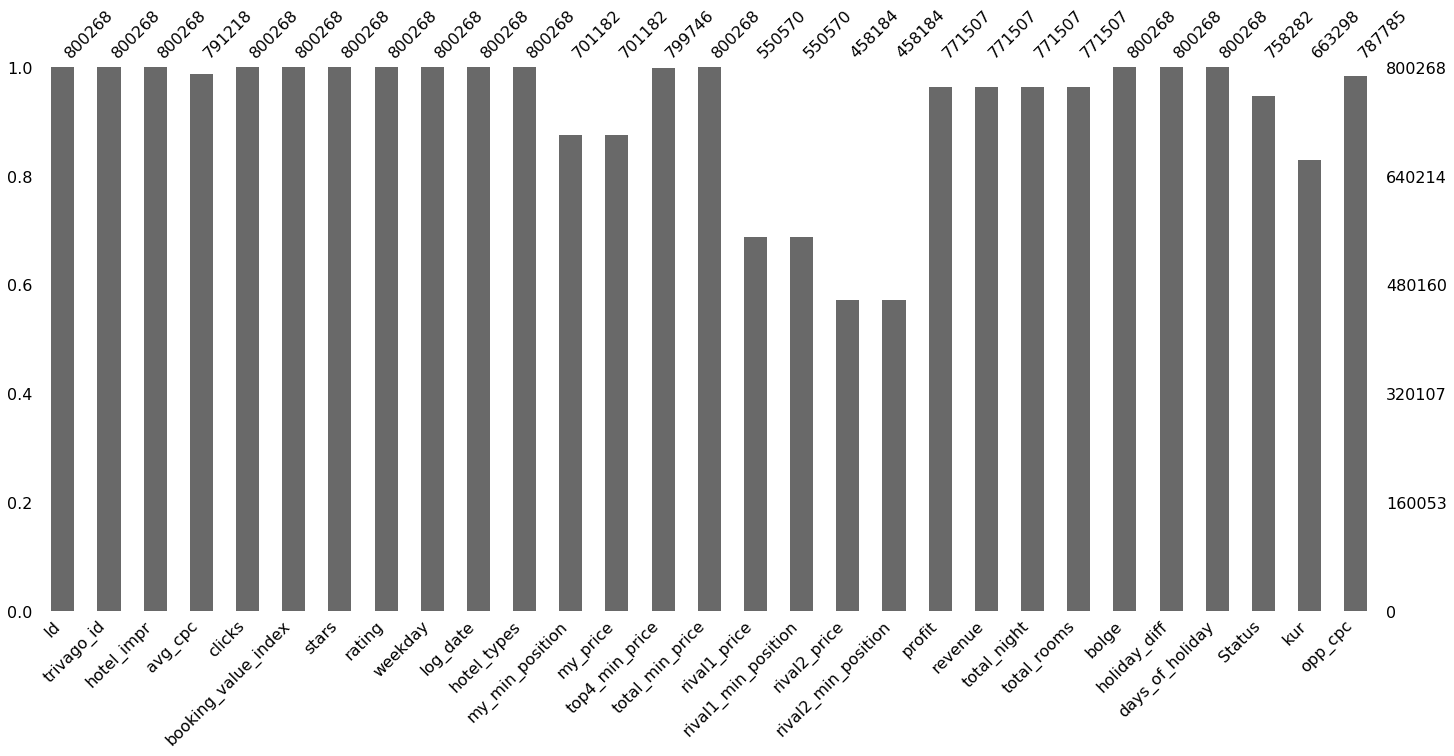

In [64]:
import missingno as msno
%matplotlib inline

msno.bar(df,color="DimGray");

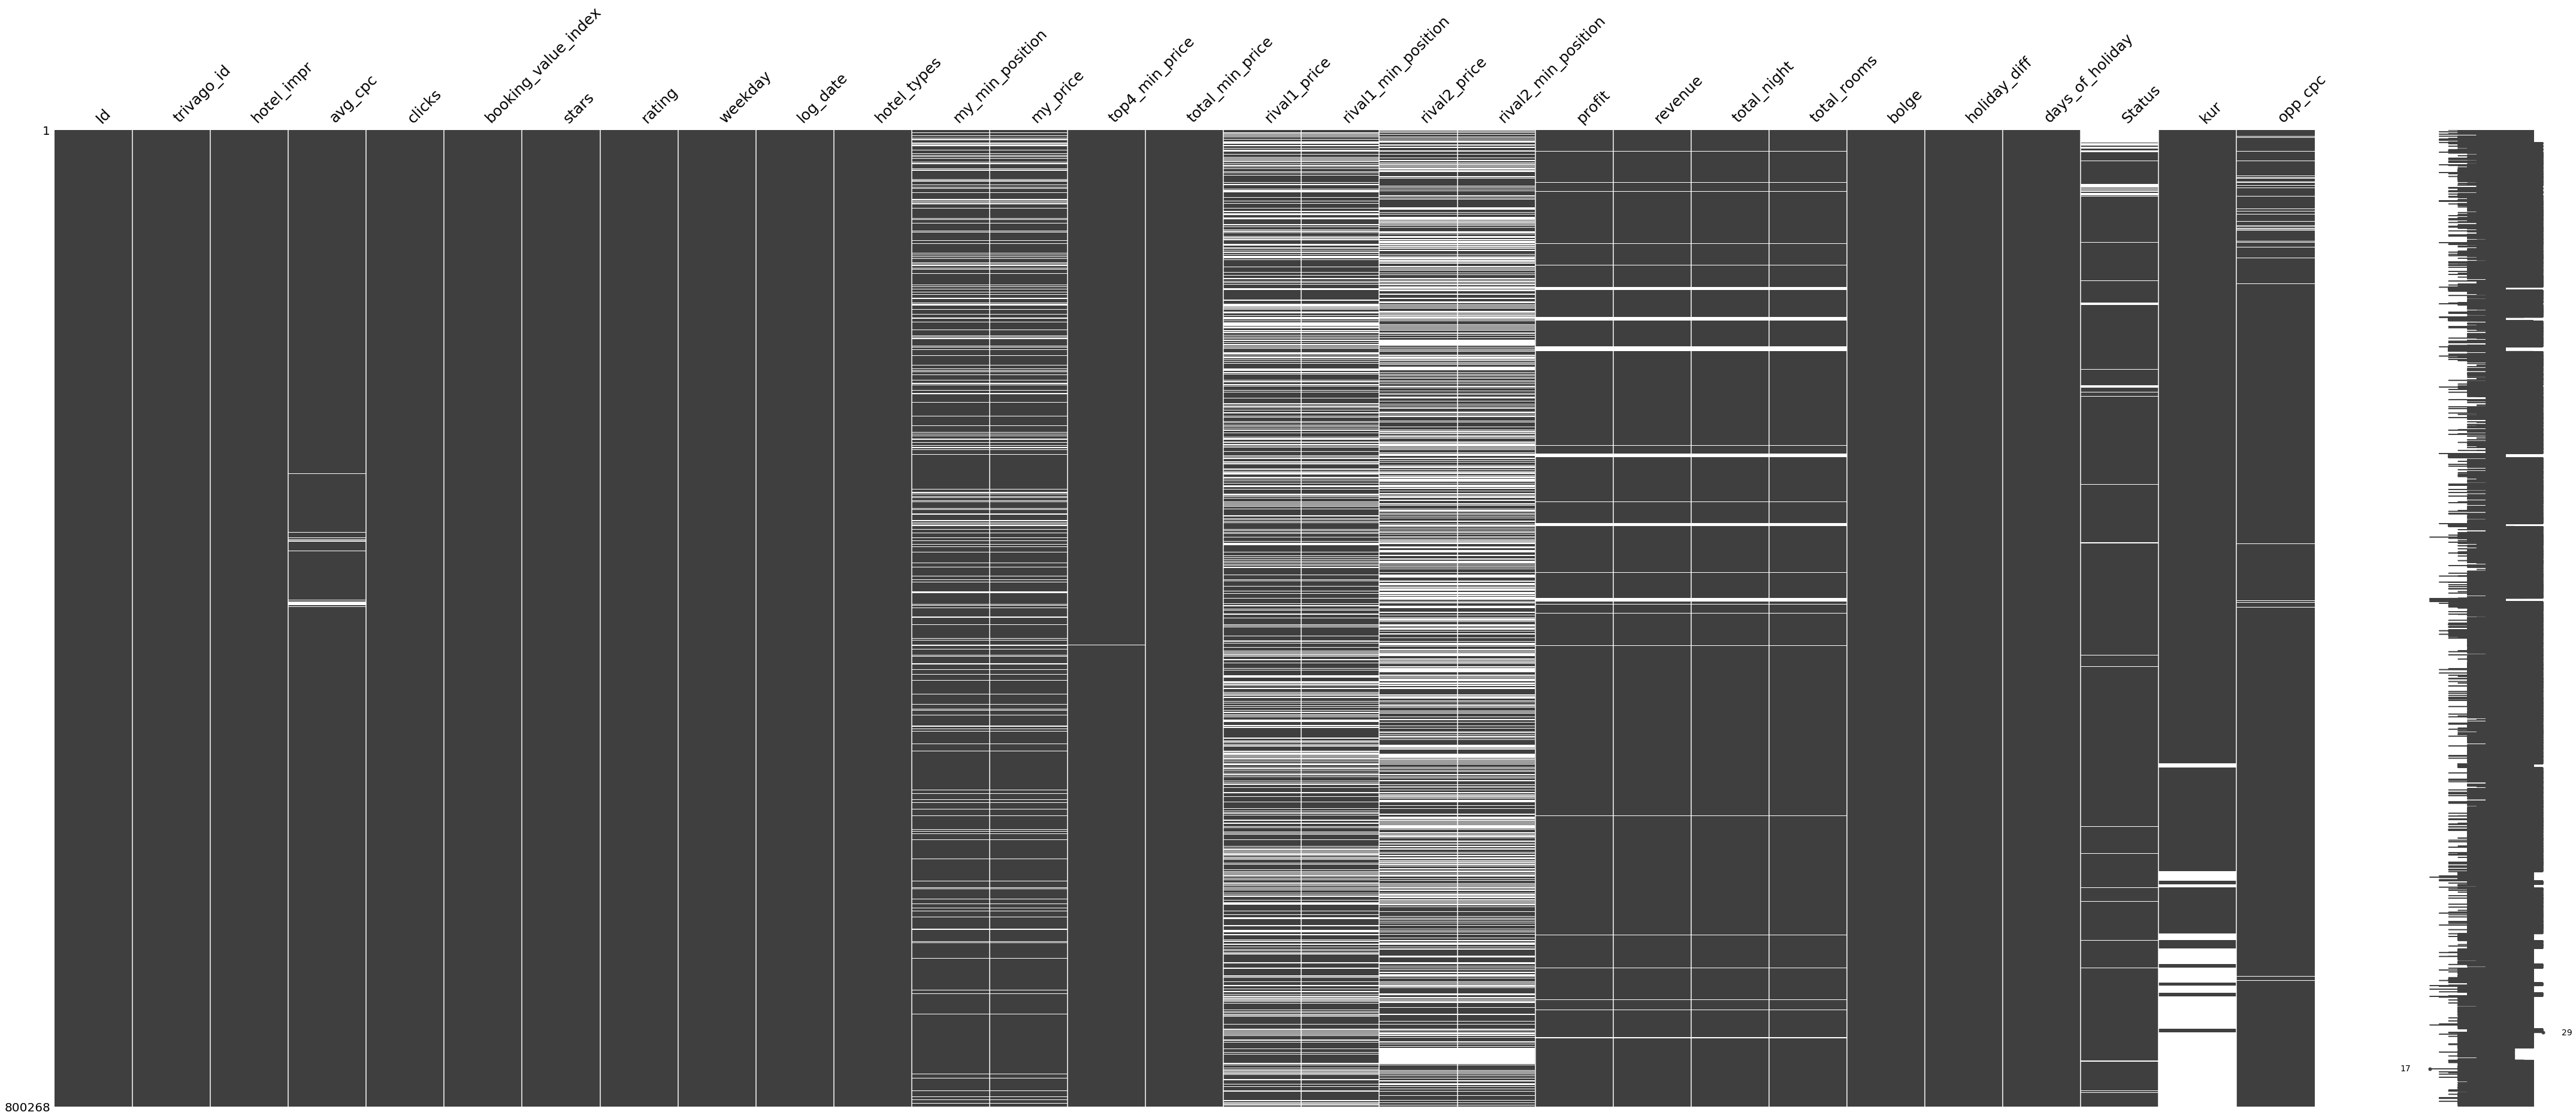

In [65]:
# msno.matrix(df.sample(250))
msno.matrix(df,figsize=(75,30),fontsize=25)

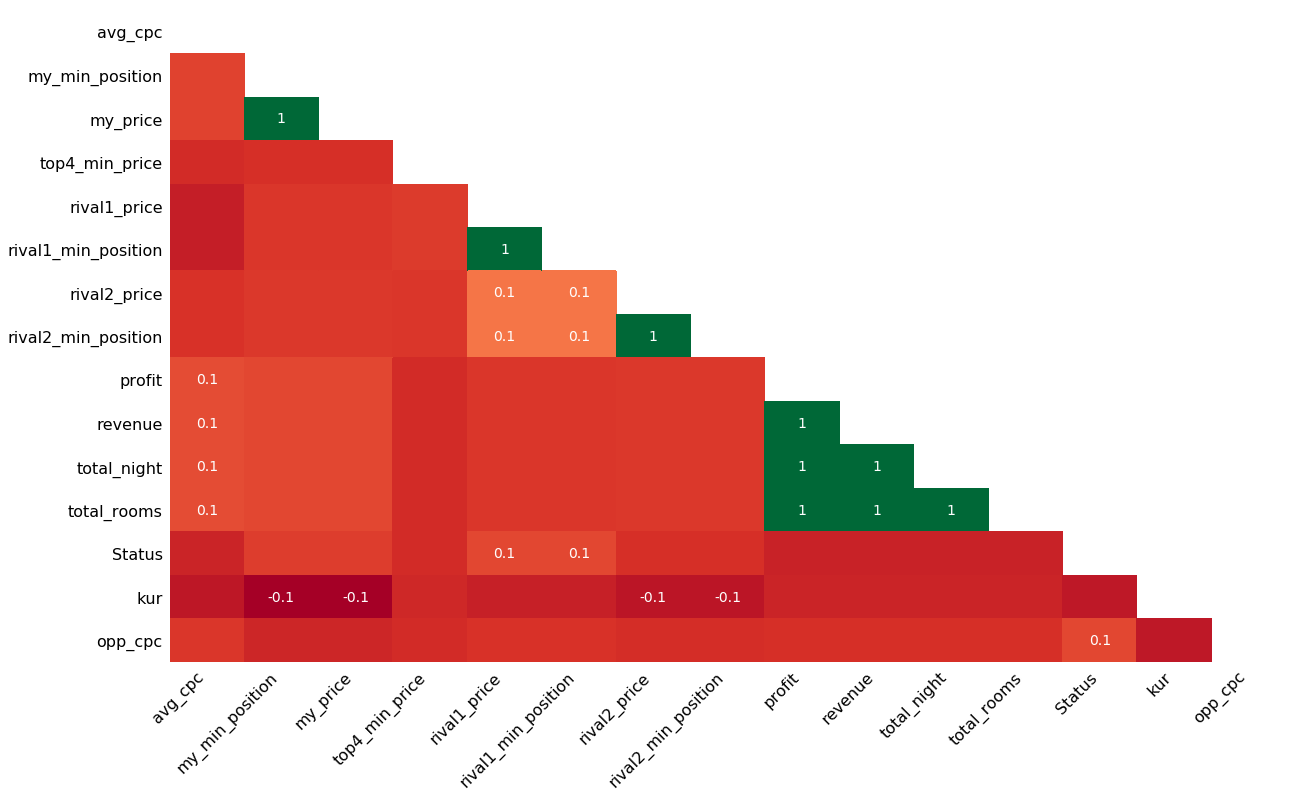

In [66]:
# nullity correlation matrix
msno.heatmap(df,cmap="RdYlGn");

In [67]:
df[["top4_min_price","avg_cpc","opp_cpc","profit","revenue",
    "total_night","total_rooms","Status","my_min_position","my_price","kur",
    "rival1_price","rival1_min_position","rival2_price","rival2_min_position"]].head(10)

,top4_min_price,avg_cpc,opp_cpc,profit,revenue,total_night,total_rooms,Status,my_min_position,my_price,kur,rival1_price,rival1_min_position,rival2_price,rival2_min_position
7279,216.0,0.12,0.14,-23.71,0.0,0.0,0.0,NaN,1.0,242.0,4.992,NaN,NaN,270.0,3.0
7453,478.0,0.15,0.42,-37.97,0.0,0.0,0.0,NaN,1.0,478.0,4.992,NaN,NaN,NaN,NaN
9032,440.0,0.10,0.21,-2.47,0.0,0.0,0.0,NaN,1.0,460.0,4.992,NaN,NaN,NaN,NaN
9202,202.0,0.14,0.16,-6.92,0.0,0.0,0.0,NaN,1.0,202.0,4.992,NaN,NaN,306.0,2.0
9985,510.0,0.22,0.30,-4.08,0.0,0.0,0.0,NaN,2.0,510.0,4.992,NaN,NaN,NaN,NaN
9986,630.0,0.20,0.24,-53.10,0.0,0.0,0.0,NaN,1.0,630.0,4.992,NaN,NaN,NaN,NaN
40893,259.0,0.14,0.16,-31.98,0.0,0.0,0.0,NaN,1.0,381.0,4.992,NaN,NaN,NaN,NaN
41808,242.0,0.03,0.09,0.00,0.0,0.0,0.0,NaN,2.0,242.0,4.992,NaN,NaN,244.0,1.0
41915,163.0,0.04,0.08,-2.72,0.0,0.0,0.0,NaN,1.0,163.0,4.992,NaN,NaN,166.0,2.0
47644,250.0,0.07,0.14,-4.75,0.0,0.0,0.0,NaN,3.0,250.0,4.992,NaN,NaN,240.0,5.0


In [68]:
df[df["top4_min_price"].isnull()].head()

,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,log_date,...,profit,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
173726,173727,2655694,45,0.00,0,1,4,68.47,Friday,2018-06-22 00:00:00.000,...,0.00,0.0,0.0,0.0,karadeniz,23,2,ParçalıBulutlu,5.4826,0.04
200919,200920,7372584,1361,0.05,6,1,0,0.00,Wednesday,2018-07-11 00:00:00.000,...,-3.09,0.0,0.0,0.0,marmara,4,2,NaN,5.6287,0.07
261518,261519,1014301,4284,0.02,19,1,0,83.56,Monday,2018-07-16 00:00:00.000,...,0.00,0.0,0.0,0.0,akdeniz,35,9,GökGürültülüSağnakYağmur,5.6651,0.05
344549,344550,4356398,58,0.01,0,1,0,0.00,Thursday,2018-09-27 00:00:00.000,...,-0.19,0.0,0.0,0.0,akdeniz,32,3,ÇoğunluklaBulutlu,7.0989,0.05
345667,345668,2037069,391,0.03,24,1,3,66.02,Thursday,2018-09-27 00:00:00.000,...,-4.63,0.0,0.0,0.0,akdeniz,32,3,ÇoğunluklaBulutlu,7.0989,0.05


# 3. Handling Null Values
- 1. Silme Yöntemi
- 2. Değer atama yöntemi  --> mean,medyan ile doldurma
- 3. Tahmine dayalı yöntemler --> ML yöntemleri (linear ve logistic regression gibi.)

###### 1 . avg_cpc 
bid amount of clicks which will be paid for per click 

In [69]:
df["avg_cpc"].head()

7279    0.12
7453    0.15
9032    0.10
9202    0.14
9985    0.22
Name: avg_cpc, dtype: float64

In [70]:
df.dropna(subset=["avg_cpc"], inplace=True)

###### 2 . opp_cpc 
it indicates the amount of avg_cpc which will be got more clicks.

In [71]:
df["opp_cpc"].head()

7279    0.14
7453    0.42
9032    0.21
9202    0.16
9985    0.30
Name: opp_cpc, dtype: float64

In [72]:
df.dropna(subset=["opp_cpc"], inplace=True)

##### 3. kur
it indicates the currency

In [73]:
df = df.set_index("log_date")
df["kur"].interpolate(inplace=True)
print(len(df[df["kur"].isnull()]))
df.tail(10)

0


,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,hotel_types,...,profit,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
log_date,,,,,,,,,,,,,,,,,,,,,
2019-01-31 00:00:00.000,802700,1971489,168,0.10,0,5,4,88.13,Thursday,City,...,-1.21,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.13
2019-01-31 00:00:00.000,802701,3376213,430,0.06,1,3,4,70.26,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.09
2019-01-31 00:00:00.000,802702,3485462,84,0.03,0,5,4,85.53,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.07
2019-01-31 00:00:00.000,802704,2568660,39,0.06,0,1,0,79.52,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.08
2019-01-31 00:00:00.000,802705,37563,187,0.03,0,1,4,71.37,Thursday,City,...,-0.18,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.12
2019-01-31 00:00:00.000,802706,3551732,56,0.09,1,4,0,84.63,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.09
2019-01-31 00:00:00.000,802707,5484818,245,0.14,2,4,0,78.71,Thursday,City,...,-14.39,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.22
2019-01-31 00:00:00.000,802708,11033526,30,0.04,0,3,0,0.00,Thursday,City,...,0.00,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.04
2019-01-31 00:00:00.000,802710,37627,136,0.08,19,5,3,71.32,Thursday,City,...,-5.80,0.0,0.0,0.0,marmara,82,4,Yağmurlu,6.254,0.10


In [74]:
df.reset_index(inplace=True);df.head()

,log_date,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,...,profit,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
0,2018-05-02 00:00:00.000,7280,33630,919,0.12,27,4,3,72.01,Wednesday,...,-23.71,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.14
1,2018-05-02 00:00:00.000,7454,97271,1864,0.15,73,5,5,82.13,Wednesday,...,-37.97,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.42
2,2018-05-02 00:00:00.000,9033,159436,1296,0.10,7,2,5,77.07,Wednesday,...,-2.47,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.21
3,2018-05-02 00:00:00.000,9203,33660,1336,0.14,29,5,4,78.20,Wednesday,...,-6.92,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.16
4,2018-05-02 00:00:00.000,9986,3406026,260,0.22,2,5,5,79.00,Wednesday,...,-4.08,0.0,0.0,0.0,marmara,17,2,NaN,4.992,0.30


###### 4 . Status
it indicates the weather status 

In [75]:
# null values for categorical variables
df.groupby("Status")["Status"].count().sort_values(ascending=False)

Status
ParçalıBulutlu                     159789
AzBulutlu                          125267
Güneşli                             85893
ÇoğunluklaBulutlu                   79660
GökGürültülüSağnakYağmur            74283
SağanakYağış                        67786
Yağmurlu                            61034
Bulutlu                             22928
ParçalıGüneşliSağanakYağış          20278
Sisli                               13127
KarYağışlı                          11589
KarlaKarışıkYağmur                   8863
ÇoğunluklaBulutluSağanakYağışlı      4485
YoğunBulutlu                         1604
YoğunKarFırtınası                    1150
ÇoğunluklaBulutluKarYağışlı           479
ParçalıGüneşliKarFırtınası            365
Rüzgarlı                              257
AraAraDoluYağışı                       91
YoğunSoğuk                             67
Buzlanma                                4
Name: Status, dtype: int64

In [76]:
# lb_make.classes_

In [77]:
df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 0)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 0)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 0)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 0)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 0)] = 'SağanakYağış'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 1)] = 'GökGürültülüSağnakYağmur'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 2)] = 'Bulutlu'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 2)] = 'Bulutlu'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 2)] = 'Bulutlu'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 2)] = 'Bulutlu'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 2)] = 'Bulutlu'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 3)] = 'GökGürültülüSağnakYağmur'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 4)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 4)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 4)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 4)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 4)] = 'SağanakYağış'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 5)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 5)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 5)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 5)] = 'SağanakYağış'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 5)] = 'SağanakYağış'

df.Status[(df["log_date"] == "2018-05-02") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-03") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-04") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-05") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'
df.Status[(df["log_date"] == "2018-05-06") & (df["bolge"] == 6)] = 'GökGürültülüSağnakYağmur'

In [78]:
df["Status"].fillna(df['Status'].transform(lambda x: x.fillna(x.mode()[0])), inplace=True)

###### 5 . total4_min_price
a minimum price which is displayed in the first slot of Trivago.

In [79]:
df[["top4_min_price","total_min_price","rival1_price","rival2_price","my_price"]].head(10)

,top4_min_price,total_min_price,rival1_price,rival2_price,my_price
0,216.0,216,NaN,270.0,242.0
1,478.0,478,NaN,NaN,478.0
2,440.0,435,NaN,NaN,460.0
3,202.0,202,NaN,306.0,202.0
4,510.0,510,NaN,NaN,510.0
5,630.0,630,NaN,NaN,630.0
6,259.0,258,NaN,NaN,381.0
7,242.0,242,NaN,244.0,242.0
8,163.0,163,NaN,166.0,163.0
9,250.0,240,NaN,240.0,250.0


In [80]:
df["top4_min_price"].fillna(df["total_min_price"],inplace=True)

###### 6 . profit
revenue - cost 

In [81]:
df[["profit","revenue","total_night","total_rooms"]].head(10)

,profit,revenue,total_night,total_rooms
0,-23.71,0.0,0.0,0.0
1,-37.97,0.0,0.0,0.0
2,-2.47,0.0,0.0,0.0
3,-6.92,0.0,0.0,0.0
4,-4.08,0.0,0.0,0.0
5,-53.10,0.0,0.0,0.0
6,-31.98,0.0,0.0,0.0
7,0.00,0.0,0.0,0.0
8,-2.72,0.0,0.0,0.0
9,-4.75,0.0,0.0,0.0


In [82]:
df.drop(["profit"],inplace=True,axis=1)

##### 7. total_night /total_tooms/ revenue
- total_night: how many nights in total the specified hotel got a reservation in the specified date
- total_rooms: how many rooms in total the specified hotel got a reservation in the specified date. 

In [83]:
df[["total_night","total_rooms","revenue"]].head(100)

,total_night,total_rooms,revenue
0,0.0,0.0,0.000000e+00
1,0.0,0.0,0.000000e+00
2,0.0,0.0,0.000000e+00
3,0.0,0.0,0.000000e+00
4,0.0,0.0,0.000000e+00
5,0.0,0.0,0.000000e+00
6,0.0,0.0,0.000000e+00
7,0.0,0.0,0.000000e+00
8,0.0,0.0,0.000000e+00
9,0.0,0.0,0.000000e+00


In [84]:
df[["total_night","total_rooms","revenue"]].where((df["revenue"] != 0) & ((df["total_night"] == None) | (df["total_night"] == 0.0))).head(10)

,total_night,total_rooms,revenue
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [85]:
df.dropna(subset=["total_night"], inplace=True)
df.dropna(subset=["total_rooms"], inplace=True)
df.dropna(subset=["revenue"], inplace=True)

##### 8. my_price
OTA's price for the specified hotel. 

In [86]:
df.dropna(subset=["my_price"], inplace=True)

##### 9. my_min_position
my_min_position: in which rank OTA's offer is displayed in Trivago.

In [87]:
df.dropna(subset=["my_min_position"], inplace=True)

##### 10. rival1_price
the most important rival's price in that hotel. 

In [88]:
df.dropna(subset=["rival1_price"], inplace=True)

##### 12. rival1_min_position
the most important rival's offer's position in that hotel. 

In [89]:
df.dropna(subset=["rival1_min_position"], inplace=True)

##### 13. rival2_price
 the second most important rival's price in that hotel.

In [90]:
# df["rival2_price"].fillna(df["total_min_price"],inplace=True)
df.dropna(subset=["rival2_price"], inplace=True)

##### 14. rival2_min_position
 the second most important rival's offer's position in that hotel. 

In [91]:
df.dropna(subset=["rival2_min_position"], inplace=True)

In [92]:
# How many missing data exist
missing_data=pd.DataFrame(df.isnull().sum().reset_index())

missing_data.columns=["index","missingcount"]
missing_data=missing_data[missing_data["missingcount"]>0]
missing_data['missingper']=(missing_data['missingcount']/df.shape[0])*100
missing_data.sort_values(by="missingper",ascending=True)

,index,missingcount,missingper


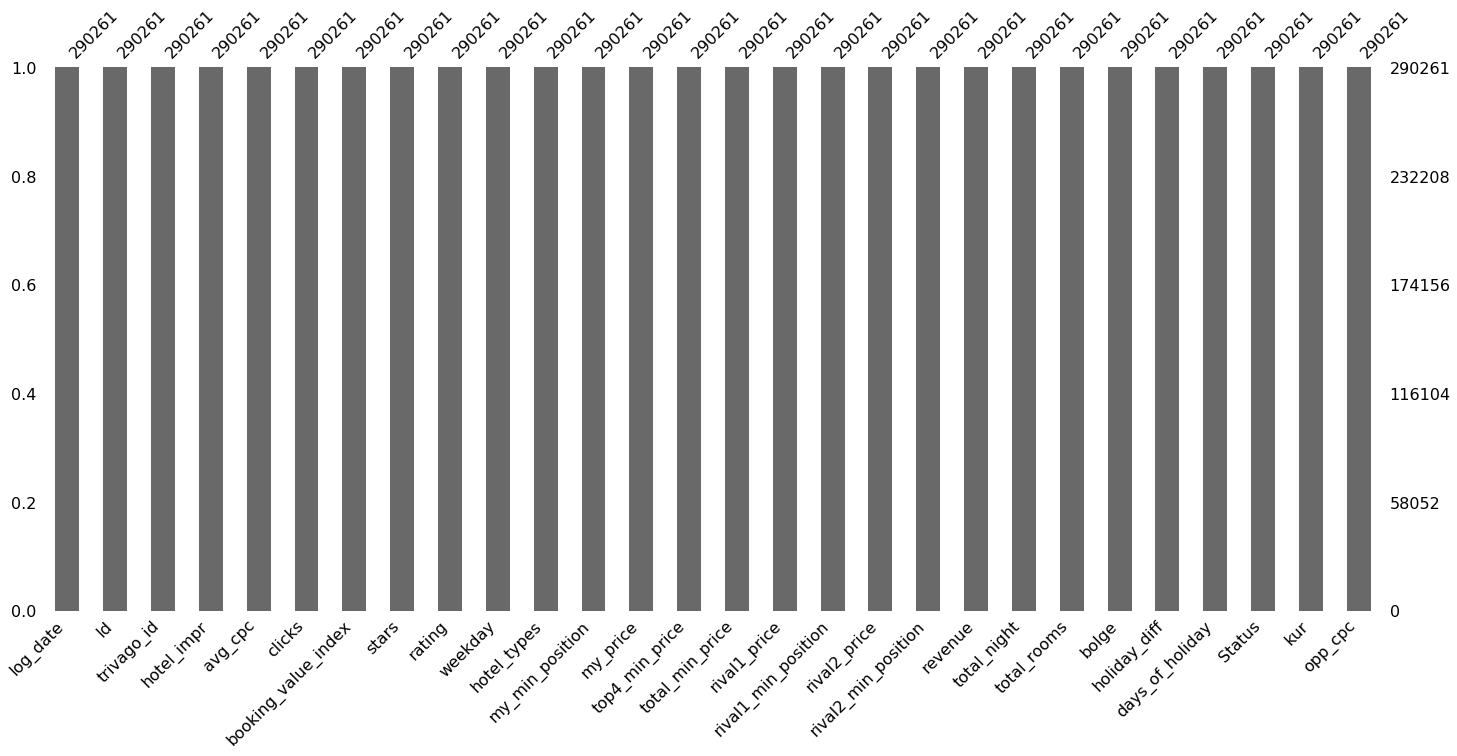

In [93]:
msno.bar(df);

In [94]:
print(len(data))
print(len(df))
print(len(str(data))-len(str(df)))

800268
290261
2047


# 3. Outliers

In [95]:
df_table = df.copy()

In [96]:
df_table.head()

,log_date,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,...,rival2_min_position,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
10,2018-05-02 00:00:00.000,49318,3443066,1603,0.14,57,5,5,78.86,Wednesday,...,9.0,1.008150e+10,2.0,2.0,marmara,17,2,ParçalıBulutlu,4.992,0.16
11,2018-05-02 00:00:00.000,49340,4410388,1034,0.08,25,5,0,74.26,Wednesday,...,11.0,0.000000e+00,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.18
12,2018-05-02 00:00:00.000,50025,383066,1631,0.06,7,5,5,79.63,Wednesday,...,3.0,0.000000e+00,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.18
13,2018-05-02 00:00:00.000,50308,5963554,1424,0.07,7,5,5,83.70,Wednesday,...,3.0,4.525200e+09,1.0,1.0,marmara,17,2,ParçalıBulutlu,4.992,0.22
29,2018-05-02 00:00:00.000,106404,4528346,206,0.04,1,1,0,79.00,Wednesday,...,3.0,0.000000e+00,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.06


In [97]:
df_table.columns

Index(['log_date', 'Id', 'trivago_id', 'hotel_impr', 'avg_cpc', 'clicks',
       'booking_value_index', 'stars', 'rating', 'weekday', 'hotel_types',
       'my_min_position', 'my_price', 'top4_min_price', 'total_min_price',
       'rival1_price', 'rival1_min_position', 'rival2_price',
       'rival2_min_position', 'revenue', 'total_night', 'total_rooms', 'bolge',
       'holiday_diff', 'days_of_holiday', 'Status', 'kur', 'opp_cpc'],
      dtype='object')

In [118]:
df_1 = df_table["opp_cpc"].copy()
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

aykiri_tf = (df_1 < (alt_sinir)) | (df_1 > (ust_sinir))

aykirilar = df_1[aykiri_tf]

print(len(df_table))


# mean_N = df_1.mean()
df_table.drop(index=aykirilar.index,inplace=True)

print(len(aykirilar))  
print(len(df_table))  


100139
5860
94279


In [119]:
len(df_table)

94279

# 4. One Hot Encoding 

In [364]:
df_enc = df_table.copy()
df_enc.head()

,log_date,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,weekday,...,rival2_min_position,revenue,total_night,total_rooms,bolge,holiday_diff,days_of_holiday,Status,kur,opp_cpc
29,2018-05-02 00:00:00.000,106404,4528346,206,0.04,1,1,0,79.00,Wednesday,...,3.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.06
36,2018-05-02 00:00:00.000,127044,5706890,5,0.01,0,1,0,79.00,Wednesday,...,2.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.15
44,2018-05-02 00:00:00.000,147366,2111186,209,0.02,0,2,4,79.00,Wednesday,...,4.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.04
49,2018-05-02 00:00:00.000,190485,1965721,196,0.01,0,1,3,77.91,Wednesday,...,1.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.09
50,2018-05-02 00:00:00.000,230125,2111136,211,0.12,2,5,4,80.00,Wednesday,...,3.0,0.0,0.0,0.0,marmara,17,2,ParçalıBulutlu,4.992,0.14


In [365]:
df_enc.dtypes

log_date                object
Id                       int64
trivago_id               int64
hotel_impr               int64
avg_cpc                float64
clicks                   int64
booking_value_index      int64
stars                    int64
rating                 float64
weekday                 object
hotel_types             object
my_min_position        float64
my_price               float64
top4_min_price         float64
total_min_price          int64
rival1_price           float64
rival1_min_position    float64
rival2_price           float64
rival2_min_position    float64
revenue                float64
total_night            float64
total_rooms            float64
bolge                   object
holiday_diff             int64
days_of_holiday          int64
Status                  object
kur                    float64
opp_cpc                float64
dtype: object

In [366]:
df_enc = pd.get_dummies(df_enc, columns = ["weekday","hotel_types","bolge","Status"], prefix = "enc",drop_first=True)
df_enc.head()

,log_date,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,my_min_position,...,enc_Rüzgarlı,enc_SağanakYağış,enc_Sisli,enc_Yağmurlu,enc_YoğunBulutlu,enc_YoğunKarFırtınası,enc_YoğunSoğuk,enc_ÇoğunluklaBulutlu,enc_ÇoğunluklaBulutluKarYağışlı,enc_ÇoğunluklaBulutluSağanakYağışlı
29,2018-05-02 00:00:00.000,106404,4528346,206,0.04,1,1,0,79.00,2.0,...,0,0,0,0,0,0,0,0,0,0
36,2018-05-02 00:00:00.000,127044,5706890,5,0.01,0,1,0,79.00,3.0,...,0,0,0,0,0,0,0,0,0,0
44,2018-05-02 00:00:00.000,147366,2111186,209,0.02,0,2,4,79.00,3.0,...,0,0,0,0,0,0,0,0,0,0
49,2018-05-02 00:00:00.000,190485,1965721,196,0.01,0,1,3,77.91,6.0,...,0,0,0,0,0,0,0,0,0,0
50,2018-05-02 00:00:00.000,230125,2111136,211,0.12,2,5,4,80.00,2.0,...,0,0,0,0,0,0,0,0,0,0


# 5. Feature Selection

In [130]:
# Light GBM Method

param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.041,
    'learning_rate': 0.0083,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1
}


def augment(x,y,t=2):
    xs,xn = [],[]
    for i in range(t):
        mask = y>0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xs.append(x1)

    for i in range(t//2):
        mask = y==0
        x1 = x[mask].copy()
        ids = np.arange(x1.shape[0])
        for c in range(x1.shape[1]):
            np.random.shuffle(ids)
            x1[:,c] = x1[ids][:,c]
        xn.append(x1)

    xs = np.vstack(xs)
    xn = np.vstack(xn)
    ys = np.ones(xs.shape[0])
    yn = np.zeros(xn.shape[0])
    x = np.vstack([x,xs,xn])
    y = np.concatenate([y,ys,yn])
    return x,y

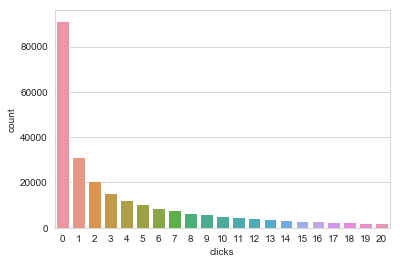

In [131]:
target = df_enc['clicks']
train = df_enc.drop(["clicks","log_date"], axis=1)
sns.set_style('whitegrid')
sns.countplot(target)

In [132]:
X_train,X_test,y_train,y_test = train_test_split(train,target,random_state=42,test_size = 0.2)

In [133]:
num_folds = 11
features = [c for c in X_train.columns if c not in ['clicks']]

folds = KFold(n_splits=num_folds, random_state=2319)
oof = np.zeros(len(X_train))
getVal = np.zeros(len(X_train))
predictions = np.zeros(len(y_train))
feature_importance_df = pd.DataFrame()

print('Light GBM Model')
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, y_train.values)):
    
    X_train_v2, y_train_v2 = X_train.iloc[trn_idx][features], y_train.iloc[trn_idx]
    X_valid, y_valid = X_train.iloc[val_idx][features], y_train.iloc[val_idx]
    
    X_tr, y_tr = augment(X_train_v2.values, y_train_v2.values)
    X_tr = pd.DataFrame(X_tr)
    
    print("Fold idx:{}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_tr, label=y_tr)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 4000)
    oof[val_idx] = clf.predict(X_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    getVal[val_idx]+= clf.predict(X_train.iloc[val_idx][features], num_iteration=clf.best_iteration) / folds.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
#     predictions += clf.predict(X_test[features], num_iteration=clf.best_iteration) / folds.n_splits


Light GBM Model
Fold idx:1
Training until validation scores don't improve for 4000 rounds.
Early stopping, best iteration is:
[41]	training's auc: 0.841678	valid_1's auc: 0.836321


ValueError: operands could not be broadcast together with shapes (197590,) (49398,) (197590,) 

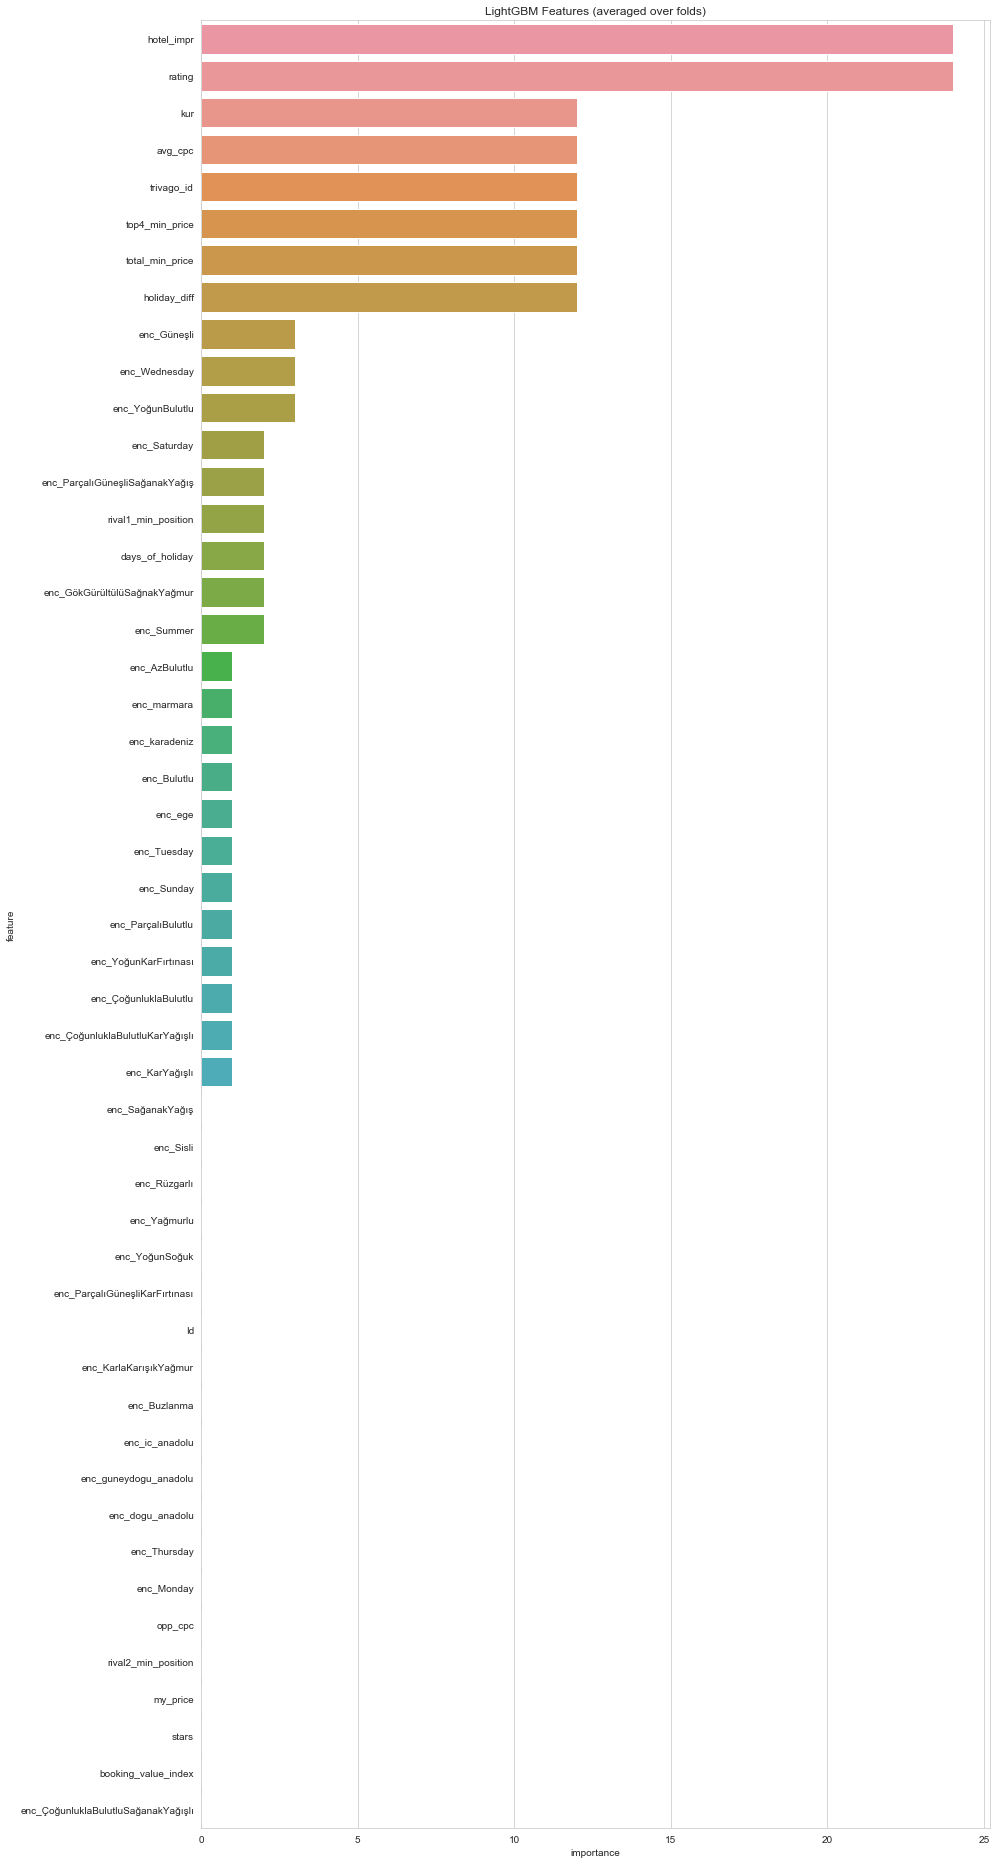

In [134]:
# Light GBM Model

import matplotlib.pyplot as plt

cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [140]:
feature_importance_df[["feature", "importance"]].sort_values("importance",ascending=False)

,feature,importance
2,hotel_impr,24
6,rating,24
14,kur,12
3,avg_cpc,12
1,trivago_id,12
8,top4_min_price,12
9,total_min_price,12
12,holiday_diff,12
33,enc_Güneşli,3
21,enc_Wednesday,3


[6.56313647e-02 5.80474637e-02 8.52956798e-02 7.45066085e-02
 3.23426276e-02 2.81881852e-02 4.16917298e-02 6.40002573e-02
 5.97582137e-02 6.09943102e-02 4.36460187e-02 0.00000000e+00
 5.40331058e-02 1.25656612e-02 5.12430694e-02 5.20735454e-02
 1.56154667e-02 1.58192176e-02 1.56149555e-02 1.68558301e-02
 1.55301314e-02 1.61462842e-02 7.46944846e-03 2.76231153e-03
 7.81591210e-03 2.38107697e-03 4.06358832e-03 5.46723553e-03
 8.07786946e-03 1.03958924e-02 3.62148241e-03 8.32654988e-07
 6.69540854e-03 6.39226117e-03 1.64274451e-03 1.87504594e-03
 1.29884414e-02 1.46700033e-04 4.16838953e-03 9.36446767e-05
 8.94732935e-03 3.11469817e-03 8.25042255e-03 9.84272423e-04
 3.49559247e-04 1.60835687e-05 1.07146020e-02 2.24581991e-04
 1.74043842e-03]


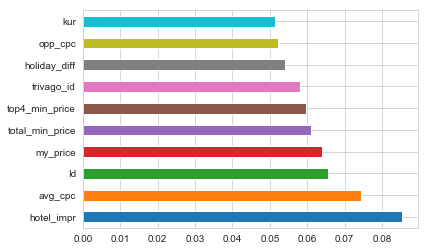

In [135]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(train,target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [137]:
# Principal Component Analysis

from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=28)
fit = pca.fit(train)
# summarize components
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.94386863e-01 5.61312679e-03 7.93556949e-09 1.86306648e-09
 1.29075266e-10 8.57307606e-11 6.12365326e-11 3.22763403e-11
 2.56879356e-13 1.66309730e-13 4.35012512e-14 4.06838717e-14
 3.77933475e-14 3.21275179e-14 2.34754940e-14 2.00171279e-14
 1.51085335e-14 1.47586171e-14 1.46331807e-14 1.43987784e-14
 1.41354463e-14 1.33365996e-14 1.21725301e-14 1.13602450e-14
 1.03592632e-14 9.42260248e-15 7.46336739e-15 7.26996577e-15]
[[ 4.42289682e-03  9.99990219e-01 -1.96898124e-05 ...  2.38133576e-09
   2.26532324e-11  1.43305291e-10]
 [-9.99990202e-01  4.42290032e-03  1.65982791e-04 ... -1.52277578e-07
  -6.69503262e-10 -2.84299961e-08]
 [ 1.67159477e-04  1.91314234e-05  9.99718665e-01 ... -4.83647308e-05
  -7.09886659e-07 -3.70006043e-06]
 ...
 [ 9.54261991e-08 -1.59230239e-09 -4.54419813e-05 ... -3.33556810e-01
   8.98884442e-04  9.93027854e-03]
 [ 2.76610261e-08  6.50924115e-10 -2.68846335e-05 ... -1.07709843e-02
   2.51795241e-04 -2.03696079e-03]
 [-2.60134295e-07  4.3

In [141]:
feature_importance_df[["feature", "importance"]].sort_values("importance",ascending=False)

,feature,importance
2,hotel_impr,24
6,rating,24
14,kur,12
3,avg_cpc,12
1,trivago_id,12
8,top4_min_price,12
9,total_min_price,12
12,holiday_diff,12
33,enc_Güneşli,3
21,enc_Wednesday,3


# 6. Stationary Check

1. Transform the time series data so that it is stationary. Specifically, a lag=1 differencing to remove the increasing trend in the data.
2. Transform the time series into a supervised learning problem. Specifically, the organization of data into input and output patterns where the observation at the previous time step is used as an input to forecast the observation at the current time timestep
3. Transform the observations to have a specific scale. Specifically, to rescale the data to values between -1 and 1 to meet the default hyperbolic tangent activation function of the LSTM model.

In [2]:
df_ts = df_enc
df_ts.set_index(["log_date"],inplace=True)
df_ts = df_ts[["clicks","hotel_impr","kur","avg_cpc","opp_cpc","my_price","total_min_price","top4_min_price"]]
df_ts.head()

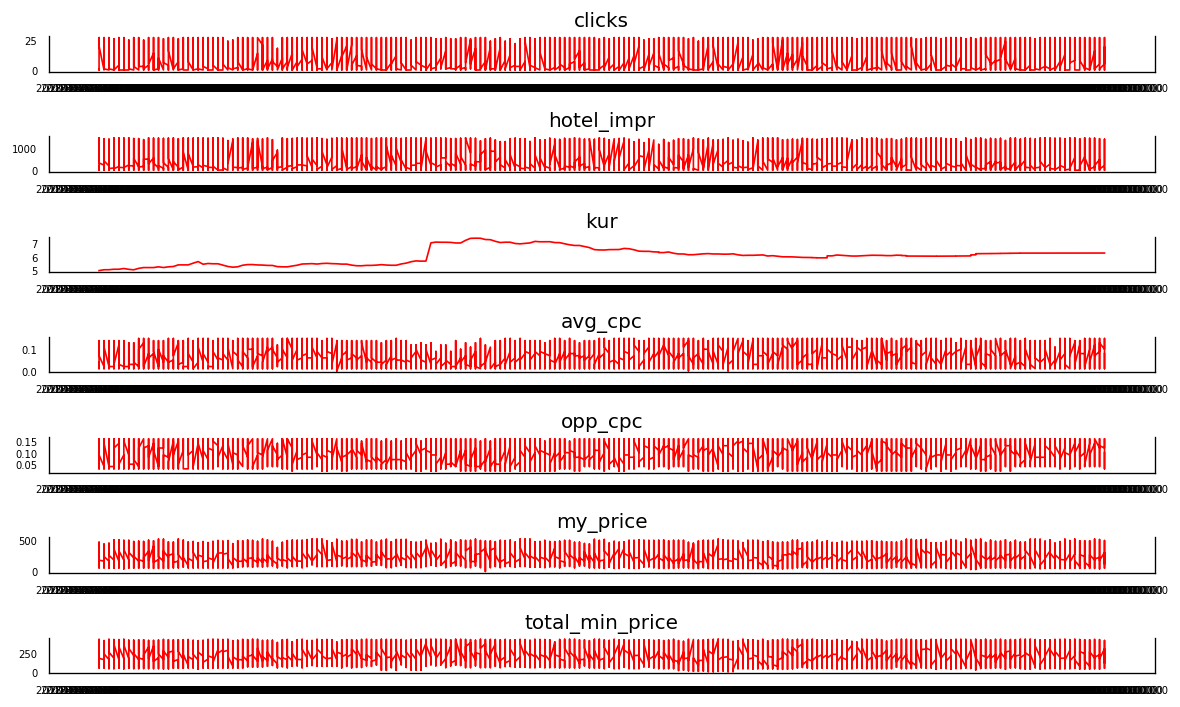

In [124]:
# Visualize the series
import matplotlib.pyplot as plt
%matplotlib inline

# Plot
fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_ts[df_ts.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_ts.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Looks like most of the series are stationary however, look into with adfuller test as well for sure.

In [126]:
# ADF test 
from statsmodels.tsa.stattools import adfuller

for name, values in df_ts.iteritems():
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    result = adfuller(df_ts[name])

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    print('\n\n')

Augmented Dickey-Fuller Test:
ADF Test Statistic : -23.05127106462317
p-value : 0.0
#Lags Used : 67
Number of Observations Used : 94211
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary



Augmented Dickey-Fuller Test:
ADF Test Statistic : -22.38748622023726
p-value : 0.0
#Lags Used : 67
Number of Observations Used : 94211
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary



Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.0978916578361995
p-value : 0.24536322119772253
#Lags Used : 0
Number of Observations Used : 94278
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 



Augmented Dickey-Fuller Test:
ADF Test Statistic : -18.34033315603192
p-value : 2.2467210902082706e-30
#Lags Used : 66
Number of Observations Used : 94212
strong evidence against the null hypothesis, reject the null hypothesis. Data has no 

The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.

In [1]:
# # 1st difference due to "kur"
df_ts = df_ts.diff().dropna()

In [ ]:
df_ts.head()

In [142]:
# from sklearn.preprocessing import StandardScaler

# # Separating out the features
# df_X = df_diff.drop(["clicks"],axis=1)
# # Separating out the target
# # Standardizing the features
# X = StandardScaler().fit_transform(df_X)
# X.head()

In [131]:
# Cointegration Check : When two or more time series are cointegrated, it means they have a long run, statistically 
# significant relationship.

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df_diff, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df_diff,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n\n\n', '--'*20)
    for col, trace, cvt in zip(df_diff.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_diff)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
clicks ::  332190.94 > 143.6691  =>   True
hotel_impr ::  285259.28 > 111.7797  =>   True
kur    ::  239048.51 > 83.9383   =>   True
avg_cpc ::  193159.6  > 60.0627   =>   True
opp_cpc ::  147788.75 > 40.1749   =>   True
my_price ::  103323.06 > 24.2761   =>   True
total_min_price ::  59497.2   > 12.3212   =>   True
top4_min_price ::  17541.4   > 4.1296    =>   True


In [133]:
nobs = 4
df_train, df_test = df_diff[0:-nobs], df_diff[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(113819, 8)
(4, 8)


# 6. Modelling

## a. VAR Model

In [152]:
# Import Statsmodels

# from statsmodels.tsa.api import VAR
# from statsmodels.tsa.vector_ar.output import VARSummary
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [155]:
model = VAR(df_diff)
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  13.26602035536363
BIC :  13.272119810297294
FPE :  577244.012880361
HQIC:  13.267860685082988 

Lag Order = 2
AIC :  12.461952405477982
BIC :  12.473473688854838
FPE :  258319.48337694464
HQIC:  12.46542861257417 

Lag Order = 3
AIC :  12.034904885219406
BIC :  12.051848082429311
FPE :  168536.03867389556
HQIC:  12.0400169967401 

Lag Order = 4
AIC :  11.776926069774632
BIC :  11.799291266209563
FPE :  130212.89840032565
HQIC:  11.783674112768198 

Lag Order = 5
AIC :  11.600357707827818
BIC :  11.628144988881875
FPE :  109136.83142114467
HQIC:  11.608741709343313 

Lag Order = 6
AIC :  11.465705307559572
BIC :  11.498914758628974
FPE :  95387.73717055848
HQIC:  11.475725294646741 

Lag Order = 7
AIC :  11.365929688421858
BIC :  11.404561394904944
FPE :  86329.76240827018
HQIC:  11.377585688131134 

Lag Order = 8
AIC :  11.277350709874273
BIC :  11.321404757171504
FPE :  79011.65963440538
HQIC:  11.290642749256778 

Lag Order = 9
AIC :  11.2087395106236
BIC :  11.2

In [157]:
# Select the lowest AIC lag.
x = model.select_order(maxlags=15)
x.summary()

,AIC,BIC,FPE,HQIC
0,15.24,15.24,4.162e+06,15.24
1,13.27,13.27,5.775e+05,13.27
2,12.46,12.47,2.584e+05,12.47
3,12.04,12.05,1.686e+05,12.04
4,11.78,11.80,1.303e+05,11.78
5,11.60,11.63,1.092e+05,11.61
6,11.47,11.50,9.542e+04,11.48
7,11.37,11.40,8.635e+04,11.38
8,11.28,11.32,7.903e+04,11.29
9,11.21,11.26,7.379e+04,11.22


In [158]:
# Fit the lowest metrics' lag which is 15
model_fitted = model.fit(15)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 25, Aug, 2019
Time:                     01:41:33
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    11.0943
Nobs:                     113808.    HQIC:                   11.0371
Log likelihood:      -1.91757e+06    FPE:                    60617.0
AIC:                      11.0123    Det(Omega_mle):         60103.9
--------------------------------------------------------------------
Results for equation clicks
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.000227         0.018369            0.012           0.990
L1.clicks                  -0.918090         0.003449         -266.216           0.000
L1.hotel_impr               0.00020

### Check for Residuals 
Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors). If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

In [164]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df_diff.columns, out):
    print(str(col), ':', round(val, 2))

clicks : 2.01
hotel_impr : 2.01
kur : 2.0
avg_cpc : 2.01
opp_cpc : 2.01
my_price : 2.01
total_min_price : 2.01
top4_min_price : 2.01


### Forecast VAR

In [161]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_diff.values[-lag_order:]
forecast_input

15


array([[ 4.000e+00, -2.400e+01,  0.000e+00,  3.000e-02,  2.000e-02,
         1.220e+02,  8.100e+01,  1.220e+02],
       [ 1.000e+00,  4.000e+01,  0.000e+00,  4.000e-02,  3.000e-02,
        -3.800e+01,  3.000e+00, -3.800e+01],
       [-5.000e+00, -6.900e+01,  0.000e+00, -5.000e-02, -6.000e-02,
        -7.000e+01, -7.000e+01, -7.000e+01],
       [ 1.000e+00,  1.070e+02,  0.000e+00,  1.000e-02,  7.000e-02,
         6.000e+00,  6.000e+00,  6.000e+00],
       [-1.000e+00, -6.900e+01,  0.000e+00, -2.000e-02, -3.000e-02,
         9.900e+01,  9.300e+01,  9.300e+01],
       [ 0.000e+00,  1.348e+03,  0.000e+00,  4.000e-02,  4.000e-02,
        -4.400e+01, -6.900e+01, -6.900e+01],
       [ 0.000e+00, -1.350e+03,  0.000e+00, -4.000e-02, -3.000e-02,
         1.370e+02,  7.400e+01,  8.000e+01],
       [ 1.400e+01,  3.020e+02,  0.000e+00,  5.000e-02,  3.000e-02,
        -3.400e+01,  6.000e+01,  5.400e+01],
       [-1.400e+01, -3.100e+02,  0.000e+00, -3.000e-02, -5.000e-02,
        -4.100e+01, -5.600e+

In [165]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_diff.index[-nobs:], columns=df_diff.columns + '_2d')
df_forecast

,clicks_2d,hotel_impr_2d,kur_2d,avg_cpc_2d,opp_cpc_2d,my_price_2d,total_min_price_2d,top4_min_price_2d
log_date,,,,,,,,
2019-01-31 00:00:00.000,-14.796158,76.659167,-0.000168,-0.011946,0.002164,168.368637,122.886070,130.192758
2019-01-31 00:00:00.000,0.568238,-7.868870,-0.000236,0.000522,0.000015,-2.923949,-1.114501,-0.280662
2019-01-31 00:00:00.000,-0.338777,34.436616,-0.000090,-0.001845,-0.000381,1.877798,1.041090,-1.075048
2019-01-31 00:00:00.000,-0.032335,-7.794950,0.000234,-0.002012,0.000093,-2.988703,-3.675662,-3.469670


In [171]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [172]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['clicks_forecast', 'hotelimpr_forecast', 'kur_forecast', 'avgcpc_forecast',
                   'oppcpc_forecast', 'myprice_forecast', 'totalminprice_forecast', 'top4minprice_forecast']]

,clicks_forecast,hotelimpr_forecast,kur_forecast,avgcpc_forecast,oppcpc_forecast,myprice_forecast,totalminprice_forecast,top4minprice_forecast
log_date,,,,,,,,
2019-01-31 00:00:00.000,-13.796158,NaN,-0.000168,NaN,NaN,NaN,NaN,NaN
2019-01-31 00:00:00.000,-31.024078,NaN,-0.000573,NaN,NaN,NaN,NaN,NaN
2019-01-31 00:00:00.000,-48.590775,NaN,-0.001068,NaN,NaN,NaN,NaN,NaN
2019-01-31 00:00:00.000,-66.189808,NaN,-0.001329,NaN,NaN,NaN,NaN,NaN


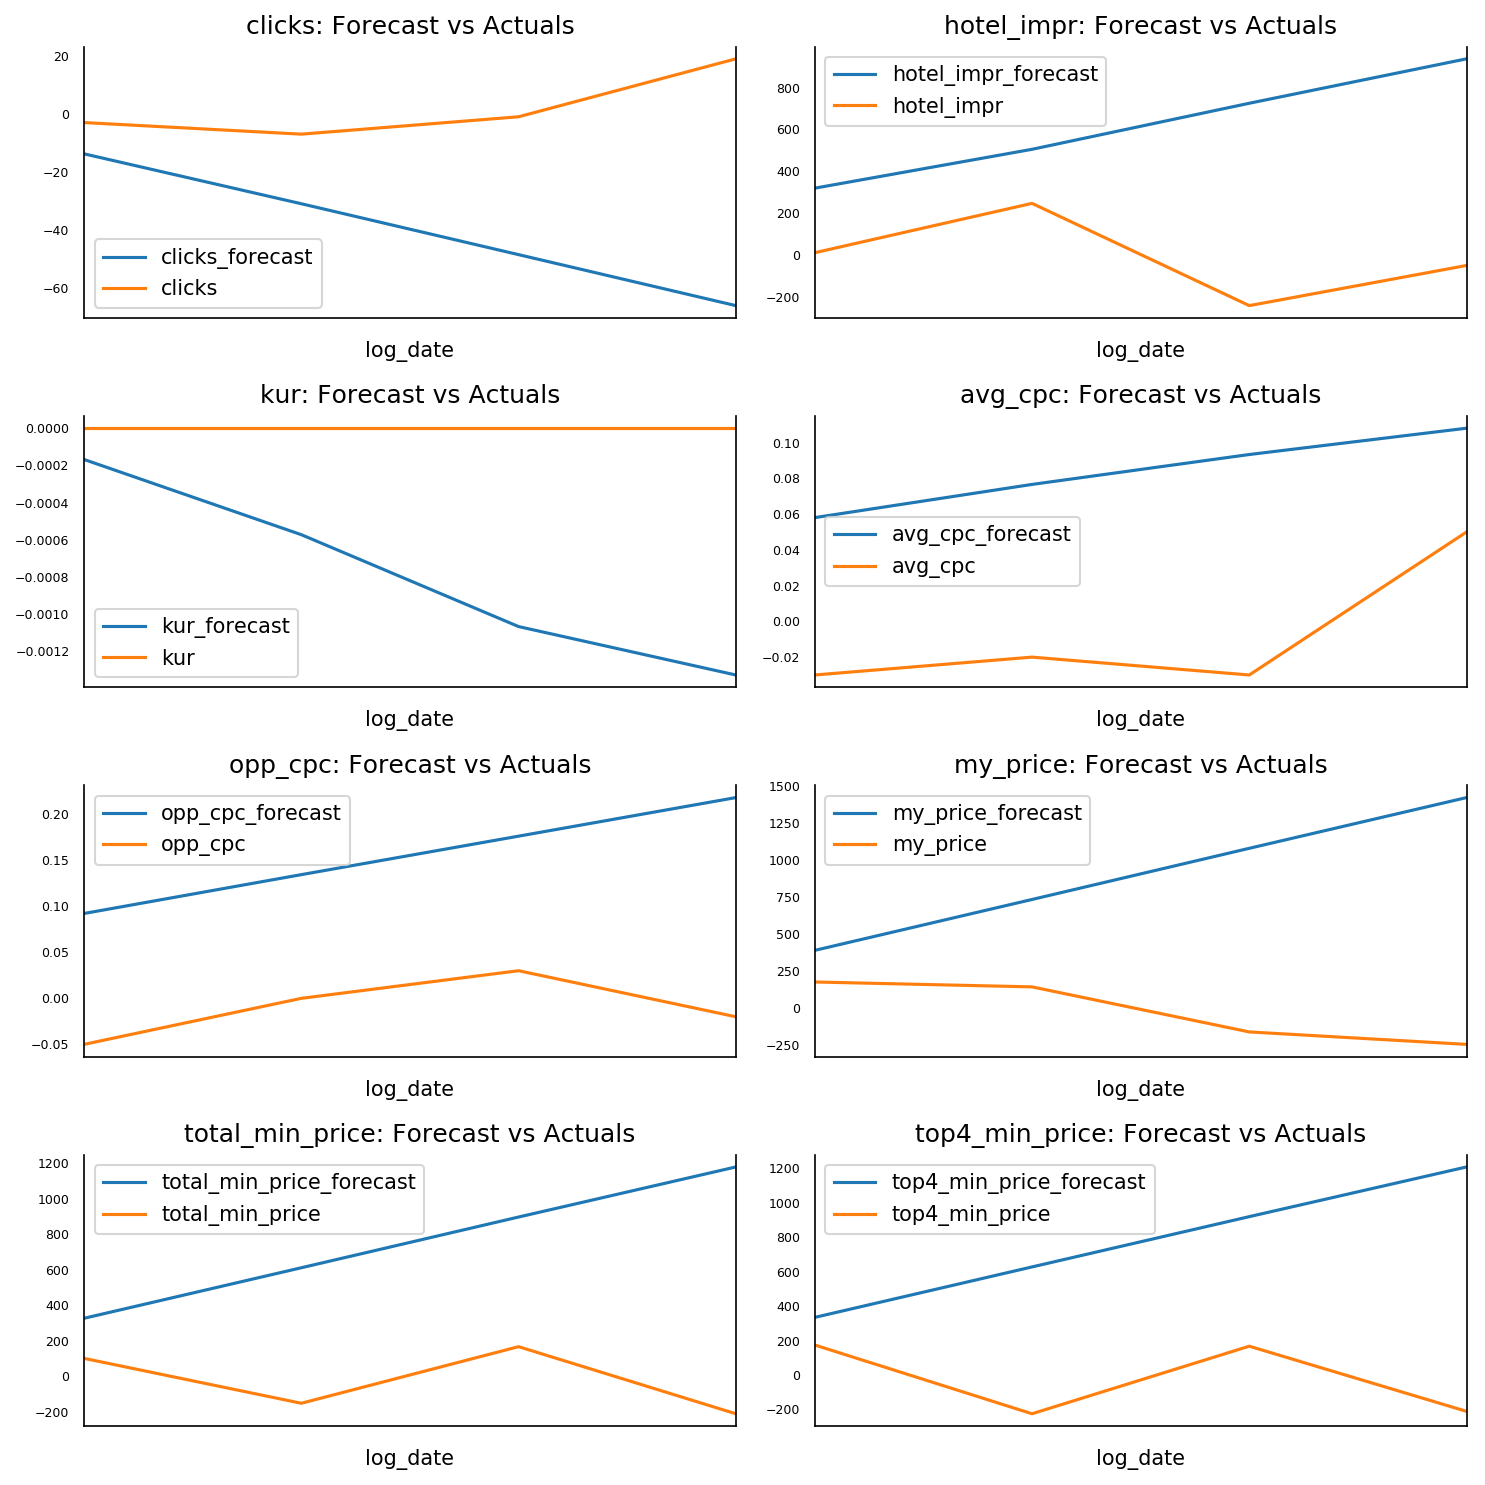

In [173]:
fig, axes = plt.subplots(nrows=int(len(df_diff.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_diff.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


## b. LSTM Model

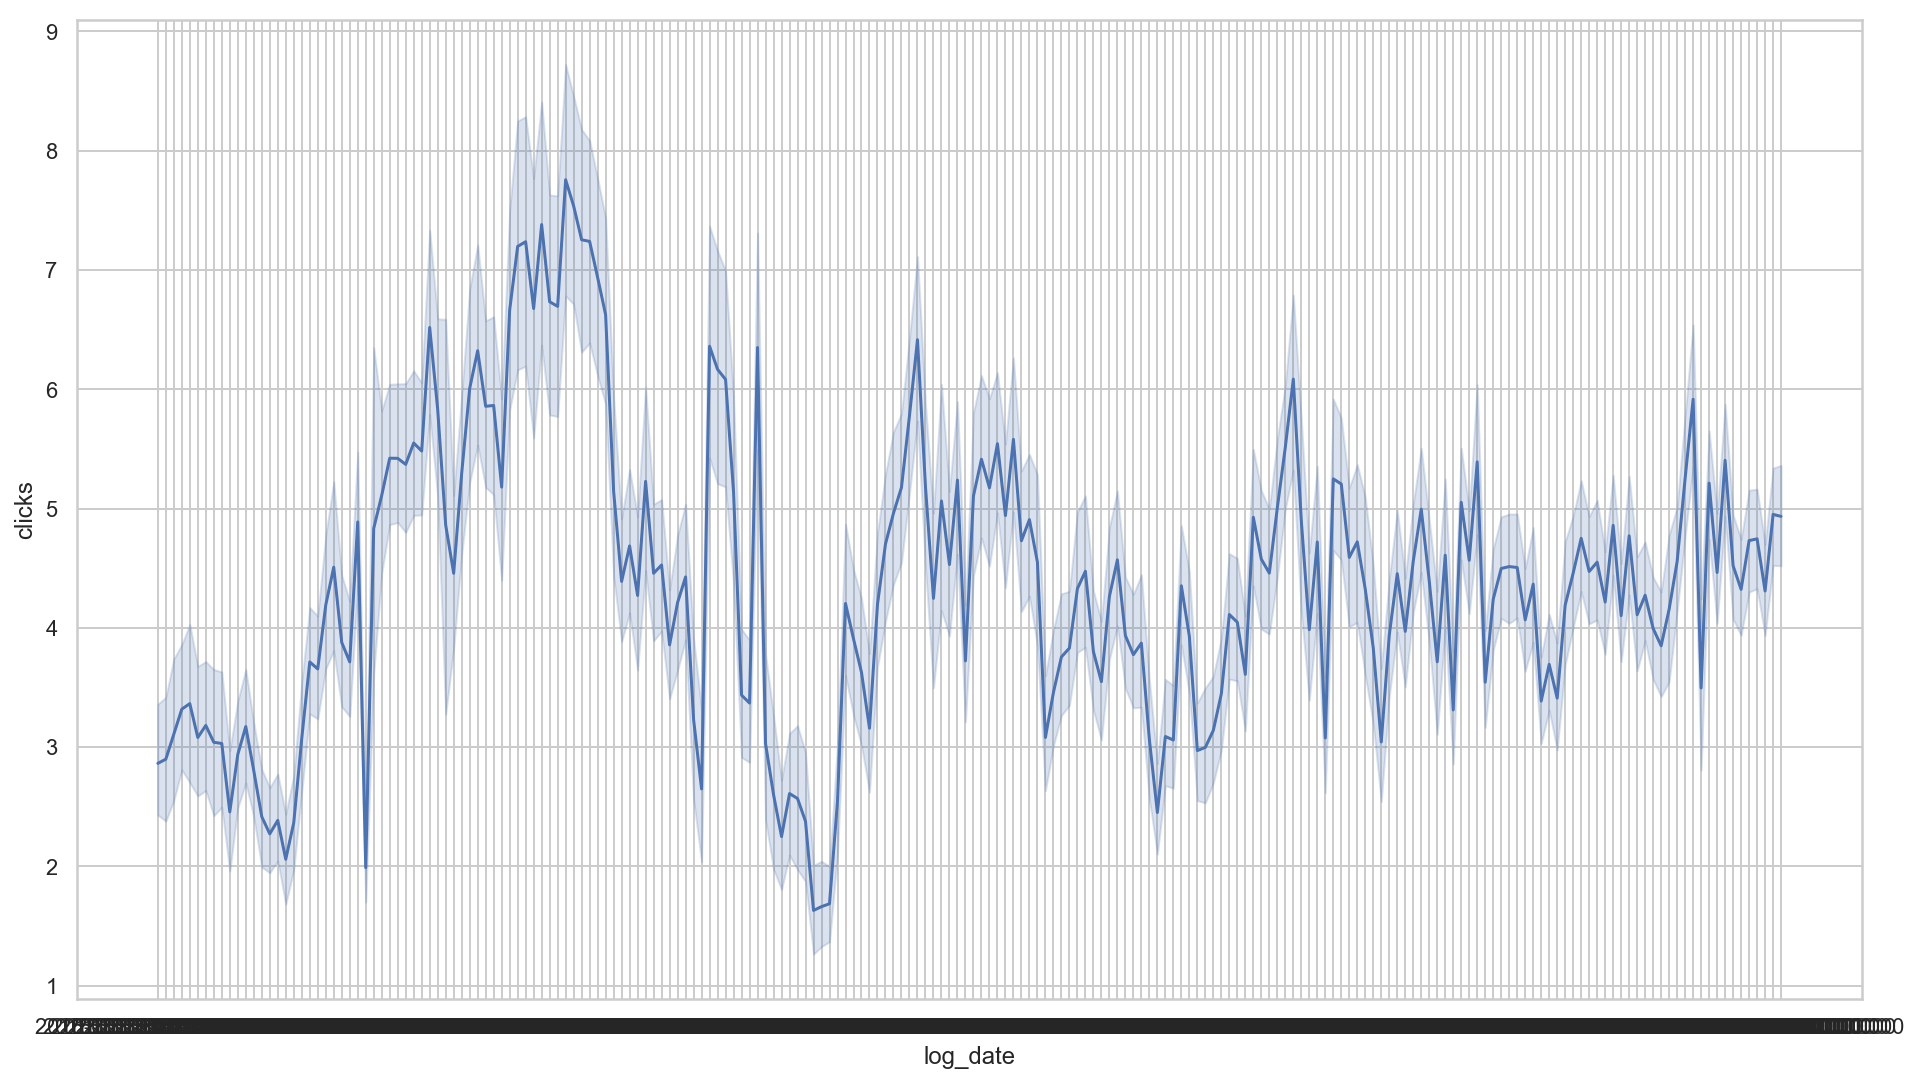

In [199]:
%config InlineBackend.figure_format = "retina"  # grafik görüntüsünü netleştir.
import seaborn as sns

sns.set_context("poster")  # set_context : poster,paper gibi parametreler alır.
sns.set(rc={"figure.figsize": (16,9.)})
sns.set_style("whitegrid")


sns.lineplot(x=df_ts.index,y="clicks", data= df_ts)

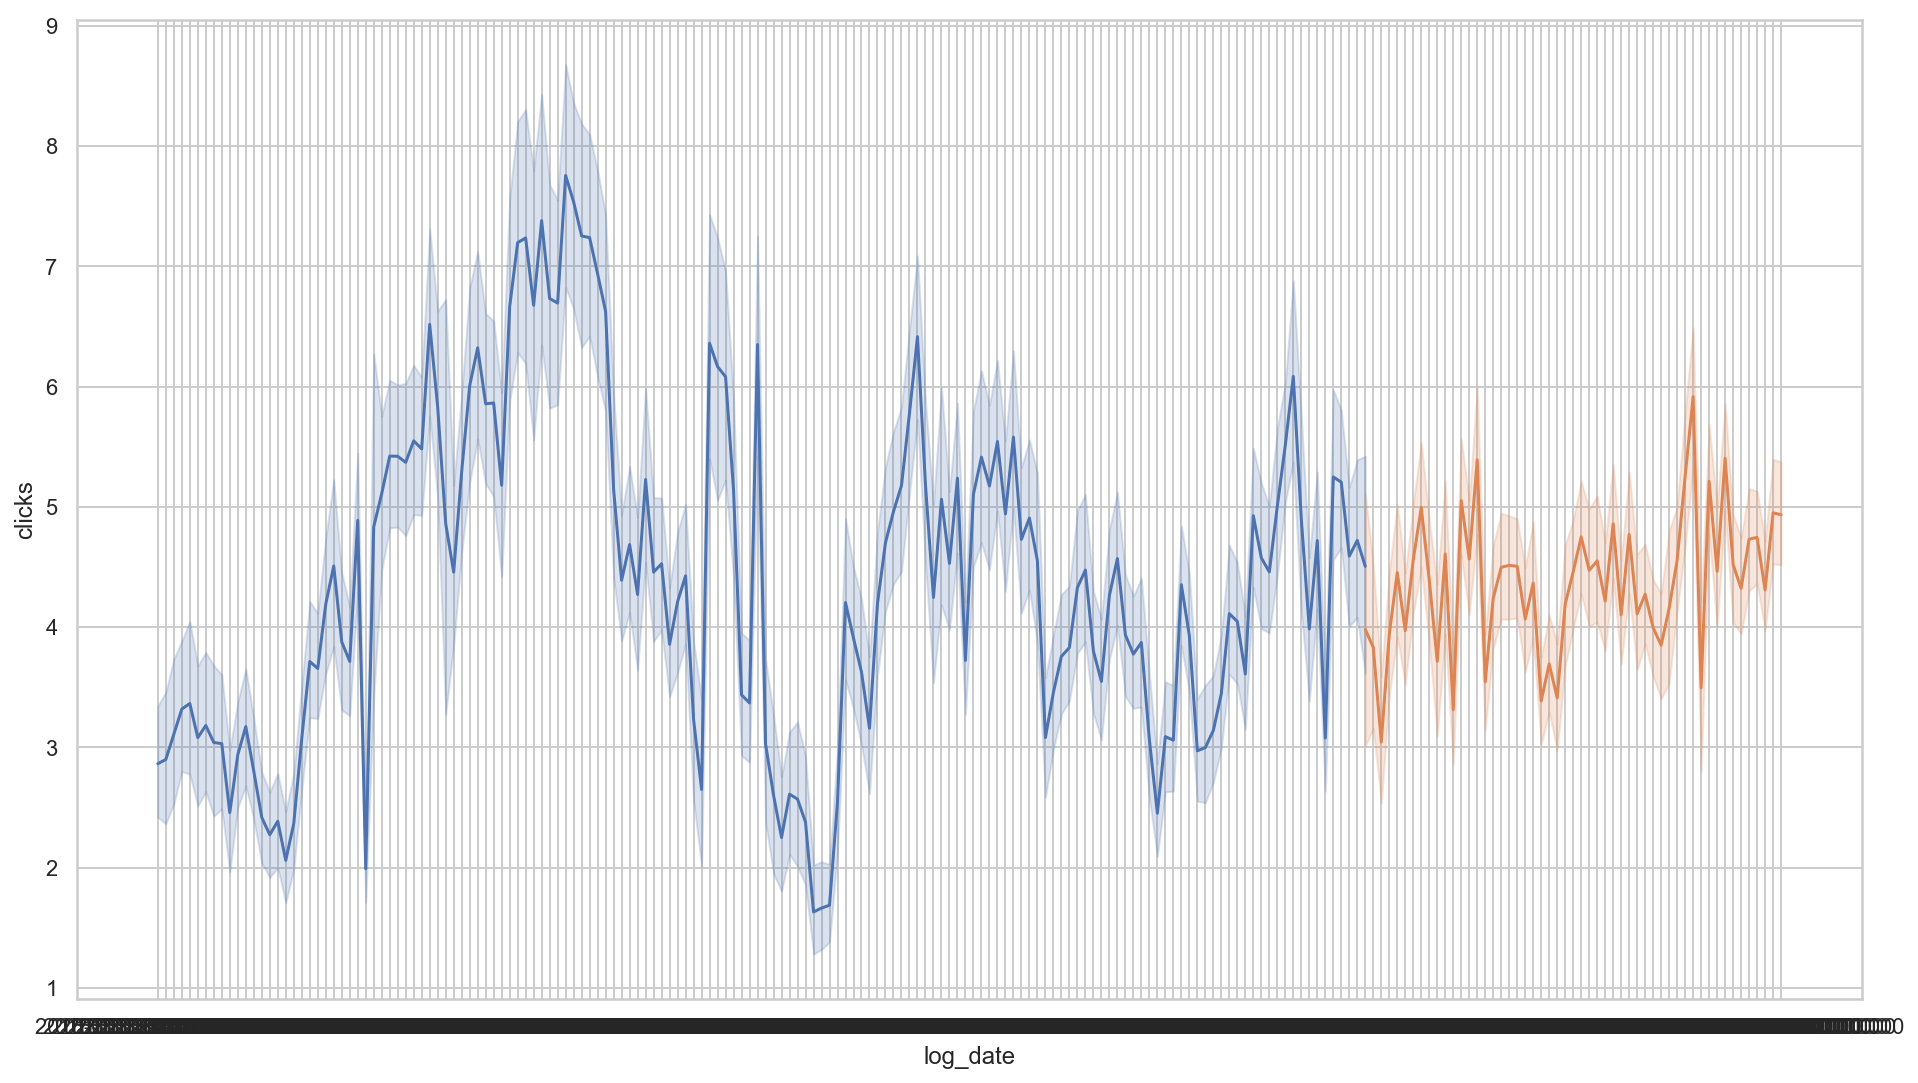

In [250]:
train = df_enc.iloc[:70000]
test = df_enc.iloc[70000:]

sns.lineplot(x=train.index,y="clicks", data= train)
sns.lineplot(x=test.index,y="clicks", data= test)

In [367]:
df_enc.head()

,log_date,Id,trivago_id,hotel_impr,avg_cpc,clicks,booking_value_index,stars,rating,my_min_position,...,enc_Rüzgarlı,enc_SağanakYağış,enc_Sisli,enc_Yağmurlu,enc_YoğunBulutlu,enc_YoğunKarFırtınası,enc_YoğunSoğuk,enc_ÇoğunluklaBulutlu,enc_ÇoğunluklaBulutluKarYağışlı,enc_ÇoğunluklaBulutluSağanakYağışlı
29,2018-05-02 00:00:00.000,106404,4528346,206,0.04,1,1,0,79.00,2.0,...,0,0,0,0,0,0,0,0,0,0
36,2018-05-02 00:00:00.000,127044,5706890,5,0.01,0,1,0,79.00,3.0,...,0,0,0,0,0,0,0,0,0,0
44,2018-05-02 00:00:00.000,147366,2111186,209,0.02,0,2,4,79.00,3.0,...,0,0,0,0,0,0,0,0,0,0
49,2018-05-02 00:00:00.000,190485,1965721,196,0.01,0,1,3,77.91,6.0,...,0,0,0,0,0,0,0,0,0,0
50,2018-05-02 00:00:00.000,230125,2111136,211,0.12,2,5,4,80.00,2.0,...,0,0,0,0,0,0,0,0,0,0


In [368]:
# Take out two inrelevant columns
df_enc = df_enc.drop(["Id","trivago_id"], axis=1)

In [369]:
df_enc.columns

Index(['log_date', 'hotel_impr', 'avg_cpc', 'clicks', 'booking_value_index',
       'stars', 'rating', 'my_min_position', 'my_price', 'top4_min_price',
       'total_min_price', 'rival1_price', 'rival1_min_position',
       'rival2_price', 'rival2_min_position', 'revenue', 'total_night',
       'total_rooms', 'holiday_diff', 'days_of_holiday', 'kur', 'opp_cpc',
       'enc_Monday', 'enc_Saturday', 'enc_Sunday', 'enc_Thursday',
       'enc_Tuesday', 'enc_Wednesday', 'enc_Summer', 'enc_dogu_anadolu',
       'enc_ege', 'enc_guneydogu_anadolu', 'enc_ic_anadolu', 'enc_karadeniz',
       'enc_marmara', 'enc_AzBulutlu', 'enc_Bulutlu',
       'enc_GökGürültülüSağnakYağmur', 'enc_Güneşli', 'enc_KarYağışlı',
       'enc_KarlaKarışıkYağmur', 'enc_ParçalıBulutlu',
       'enc_ParçalıGüneşliKarFırtınası', 'enc_ParçalıGüneşliSağanakYağış',
       'enc_Rüzgarlı', 'enc_SağanakYağış', 'enc_Sisli', 'enc_Yağmurlu',
       'enc_YoğunBulutlu', 'enc_YoğunKarFırtınası', 'enc_YoğunSoğuk',
       'enc_Çoğunluk

In [370]:
# Reorder the columns
df_enc = df_enc[['clicks','hotel_impr', 'avg_cpc',  'booking_value_index', 'stars',
       'rating', 'my_min_position', 'my_price', 'top4_min_price',
       'total_min_price', 'rival1_price', 'rival1_min_position',
       'rival2_price', 'rival2_min_position', 'revenue', 'total_night',
       'total_rooms', 'holiday_diff', 'days_of_holiday', 'kur', 'opp_cpc',
       'enc_Monday', 'enc_Saturday', 'enc_Sunday', 'enc_Thursday',
       'enc_Tuesday', 'enc_Wednesday', 'enc_Summer', 'enc_dogu_anadolu',
       'enc_ege', 'enc_guneydogu_anadolu', 'enc_ic_anadolu', 'enc_karadeniz',
       'enc_marmara', 'enc_AzBulutlu', 'enc_Bulutlu',
       'enc_GökGürültülüSağnakYağmur', 'enc_Güneşli', 'enc_KarYağışlı',
       'enc_KarlaKarışıkYağmur', 'enc_ParçalıBulutlu',
       'enc_ParçalıGüneşliKarFırtınası', 'enc_ParçalıGüneşliSağanakYağış',
       'enc_Rüzgarlı', 'enc_SağanakYağış', 'enc_Sisli', 'enc_Yağmurlu',
       'enc_YoğunBulutlu', 'enc_YoğunKarFırtınası', 'enc_YoğunSoğuk',
       'enc_ÇoğunluklaBulutlu', 'enc_ÇoğunluklaBulutluKarYağışlı',
       'enc_ÇoğunluklaBulutluSağanakYağışlı']]

In [372]:
df_enc.head()

,clicks,hotel_impr,avg_cpc,booking_value_index,stars,rating,my_min_position,my_price,top4_min_price,total_min_price,...,enc_Rüzgarlı,enc_SağanakYağış,enc_Sisli,enc_Yağmurlu,enc_YoğunBulutlu,enc_YoğunKarFırtınası,enc_YoğunSoğuk,enc_ÇoğunluklaBulutlu,enc_ÇoğunluklaBulutluKarYağışlı,enc_ÇoğunluklaBulutluSağanakYağışlı
29,1,206,0.04,1,0,79.00,2.0,179.0,179.0,179,...,0,0,0,0,0,0,0,0,0,0
36,0,5,0.01,1,0,79.00,3.0,271.0,263.0,263,...,0,0,0,0,0,0,0,0,0,0
44,0,209,0.02,2,4,79.00,3.0,165.0,165.0,165,...,0,0,0,0,0,0,0,0,0,0
49,0,196,0.01,1,3,77.91,6.0,238.0,210.0,210,...,0,0,0,0,0,0,0,0,0,0
50,2,211,0.12,5,4,80.00,2.0,166.0,166.0,166,...,0,0,0,0,0,0,0,0,0,0


In [373]:
# 1st difference
# df_enc = df_enc.diff().dropna()

In [374]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [376]:
values = df_enc.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.037037   0.140604   0.266667       0.00        0.0   0.579207   
2   0.000000   0.002743   0.066667       0.00        0.0   0.579207   
3   0.000000   0.142661   0.133333       0.25        0.8   0.579207   
4   0.000000   0.133745   0.066667       0.00        0.6   0.550946   
5   0.074074   0.144033   0.800000       1.00        0.8   0.605134   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)    ...     var44(t)  var45(t)  \
1        0.2   0.343570   0.388128    0.407674    ...          0.0       0.0   
2        0.4   0.520154   0.579909    0.609113    ...          0.0       0.0   
3        0.4   0.316699   0.356164    0.374101    ...          0.0       0.0   
4        1.0   0.456814   0.458904    0.482014    ...          0.0       0.0   
5        0.2   0.318618   0.358447    0.376499    ...          0.0       0.0   

   var46(t)  var47(t)  var48(t)  var49(t)  var50(t)  var51(t)  var52(t)  \
1       0.0      

In [377]:
# split into train and test sets
values = reframed.values
n_train_hours = 70000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(70000, 1, 105) (70000,) (24278, 1, 105) (24278,)


Train on 70000 samples, validate on 24278 samples
Epoch 1/20
 - 8s - loss: 0.0253 - val_loss: 0.0184
Epoch 2/20
 - 6s - loss: 0.0100 - val_loss: 0.0129
Epoch 3/20
 - 6s - loss: 0.0081 - val_loss: 0.0121
Epoch 4/20
 - 6s - loss: 0.0075 - val_loss: 0.0117
Epoch 5/20
 - 5s - loss: 0.0072 - val_loss: 0.0117
Epoch 6/20
 - 5s - loss: 0.0071 - val_loss: 0.0115
Epoch 7/20
 - 5s - loss: 0.0071 - val_loss: 0.0115
Epoch 8/20
 - 5s - loss: 0.0070 - val_loss: 0.0114
Epoch 9/20
 - 5s - loss: 0.0068 - val_loss: 0.0106
Epoch 10/20
 - 5s - loss: 0.0056 - val_loss: 0.0083
Epoch 11/20
 - 5s - loss: 0.0040 - val_loss: 0.0080
Epoch 12/20
 - 5s - loss: 0.0036 - val_loss: 0.0071
Epoch 13/20
 - 5s - loss: 0.0034 - val_loss: 0.0067
Epoch 14/20
 - 7s - loss: 0.0033 - val_loss: 0.0075
Epoch 15/20
 - 7s - loss: 0.0030 - val_loss: 0.0069
Epoch 16/20
 - 6s - loss: 0.0031 - val_loss: 0.0059
Epoch 17/20
 - 5s - loss: 0.0028 - val_loss: 0.0069
Epoch 18/20
 - 5s - loss: 0.0025 - val_loss: 0.0062
Epoch 19/20
 - 7s - los

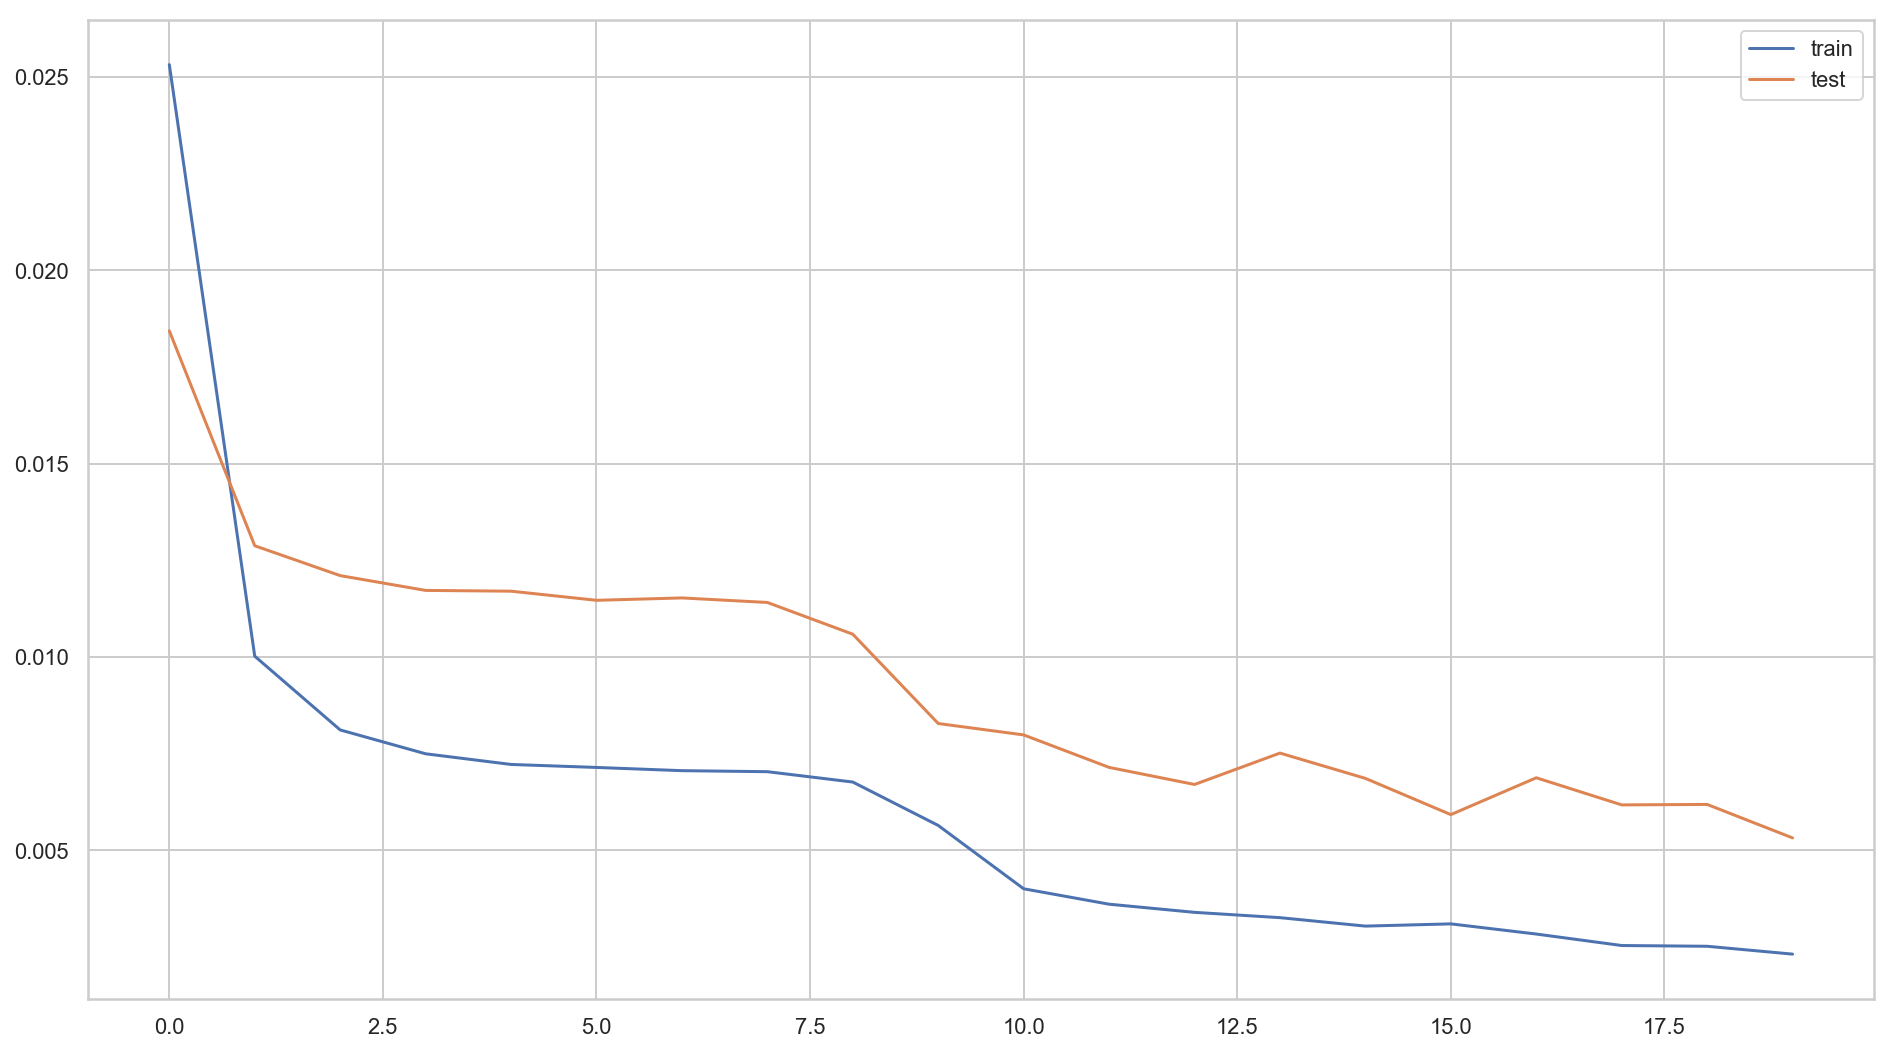

In [393]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [394]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 50)                31200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 31,251
Trainable params: 31,251
Non-trainable params: 0
_________________________________________________________________


In [395]:
test_X

array([[[0.25925925, 0.40809327, 0.39999998, ..., 0.        ,
         0.        , 0.        ]],

       [[0.07407407, 0.2894376 , 0.19999999, ..., 0.        ,
         1.        , 0.        ]],

       [[0.07407407, 0.45336077, 0.13333333, ..., 0.        ,
         0.        , 0.        ]],

       ...,

       [[0.5185185 , 0.24005488, 0.6       , ..., 0.        ,
         0.        , 0.        ]],

       [[0.25925925, 0.03292181, 0.46666667, ..., 0.        ,
         0.        , 0.        ]],

       [[0.4074074 , 0.1186557 , 0.7333333 , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)

In [396]:
# Evaluate the result
y_pred_test_lstm = model.predict(test_X)
y_train_pred_lstm = model.predict(train_X)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(train_y, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(test_y, y_pred_test_lstm)))

The R2 score on the Train set is:	0.812
The R2 score on the Test set is:	0.763


In [397]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(test_y, y_pred_test_lstm))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.052


In [547]:
# # Compare forecasts to actuals 

# lstm_predictions_scaled = list()

# batch = test_X[:10,:]
# current_batch = batch.reshape((10,1,105))

# for i in range(10):   
#     lstm_pred = model.predict(current_batch)[0]
#     lstm_predictions_scaled.append(lstm_pred) 
#     current_batch = np.append(current_batch[:,:,1:],[[lstm_pred]],axis=1)

In [510]:
lstm_predictions_scaled

[array([3.3371111e-06], dtype=float32),
 array([3.3371111e-06], dtype=float32),
 array([3.3371111e-06], dtype=float32),
 array([3.3371111e-06], dtype=float32),
 array([3.3371111e-06], dtype=float32),
 array([3.3371111e-06], dtype=float32),
 array([3.3371111e-06], dtype=float32),
 array([3.3371111e-06], dtype=float32),
 array([3.3371111e-06], dtype=float32),
 array([3.3371111e-06], dtype=float32)]

In [546]:
# lstm_predictions = scaler.inverse_transform(model.predict(test[:10,:].reshape((10,1,105))[0]))
# lstm_predictions

## c. LSTM ( Retrained )

In [539]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [589]:
X = df_enc
dataset = pd.DataFrame(X)

values = dataset.values
values

array([[1.00e+00, 2.06e+02, 4.00e-02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 5.00e+00, 1.00e-02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 2.09e+02, 2.00e-02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [7.00e+00, 4.90e+01, 7.00e-02, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.10e+01, 1.74e+02, 1.10e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.90e+01, 1.36e+02, 8.00e-02, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [593]:
len(values)

94279

In [594]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

train_size = int(len(values) * 0.80)
test_size = len(values) - train_size
train, test = values[0:train_size,:], values[train_size:len(values),:]

In [595]:
train.shape

(75423, 53)

In [580]:
import math
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_obs=len(values)
h=math.floor(n_obs*0.2) #forecast horizon
train_sample=(n_obs-h)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.037037   0.140604   0.266667       0.00        0.0   0.579207   
2   0.000000   0.002743   0.066667       0.00        0.0   0.579207   
3   0.000000   0.142661   0.133333       0.25        0.8   0.579207   
4   0.000000   0.133745   0.066667       0.00        0.6   0.550946   
5   0.074074   0.144033   0.800000       1.00        0.8   0.605134   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)    ...     var44(t)  var45(t)  \
1        0.2   0.343570   0.388128    0.407674    ...          0.0       0.0   
2        0.4   0.520154   0.579909    0.609113    ...          0.0       0.0   
3        0.4   0.316699   0.356164    0.374101    ...          0.0       0.0   
4        1.0   0.456814   0.458904    0.482014    ...          0.0       0.0   
5        0.2   0.318618   0.358447    0.376499    ...          0.0       0.0   

   var46(t)  var47(t)  var48(t)  var49(t)  var50(t)  var51(t)  var52(t)  \
1       0.0      

In [588]:
reframed.shape

(94278, 106)

In [582]:
train = values[:train_sample, :]
test = values[train_sample:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(75423, 1, 105) (75423,) (18855, 1, 105) (18855,)


Train on 75423 samples, validate on 18855 samples
Epoch 1/30
 - 8s - loss: 0.0253 - val_loss: 0.0171
Epoch 2/30
 - 5s - loss: 0.0097 - val_loss: 0.0149
Epoch 3/30
 - 5s - loss: 0.0076 - val_loss: 0.0140
Epoch 4/30
 - 5s - loss: 0.0072 - val_loss: 0.0139
Epoch 5/30
 - 5s - loss: 0.0069 - val_loss: 0.0139
Epoch 6/30
 - 5s - loss: 0.0069 - val_loss: 0.0138
Epoch 7/30
 - 5s - loss: 0.0068 - val_loss: 0.0137
Epoch 8/30
 - 5s - loss: 0.0068 - val_loss: 0.0137
Epoch 9/30
 - 5s - loss: 0.0065 - val_loss: 0.0126
Epoch 10/30
 - 5s - loss: 0.0052 - val_loss: 0.0099
Epoch 11/30
 - 5s - loss: 0.0039 - val_loss: 0.0096
Epoch 12/30
 - 5s - loss: 0.0036 - val_loss: 0.0082
Epoch 13/30
 - 5s - loss: 0.0034 - val_loss: 0.0082
Epoch 14/30
 - 5s - loss: 0.0032 - val_loss: 0.0077
Epoch 15/30
 - 5s - loss: 0.0030 - val_loss: 0.0071
Epoch 16/30
 - 5s - loss: 0.0029 - val_loss: 0.0079
Epoch 17/30
 - 5s - loss: 0.0028 - val_loss: 0.0064
Epoch 18/30
 - 5s - loss: 0.0025 - val_loss: 0.0065
Epoch 19/30
 - 5s - los

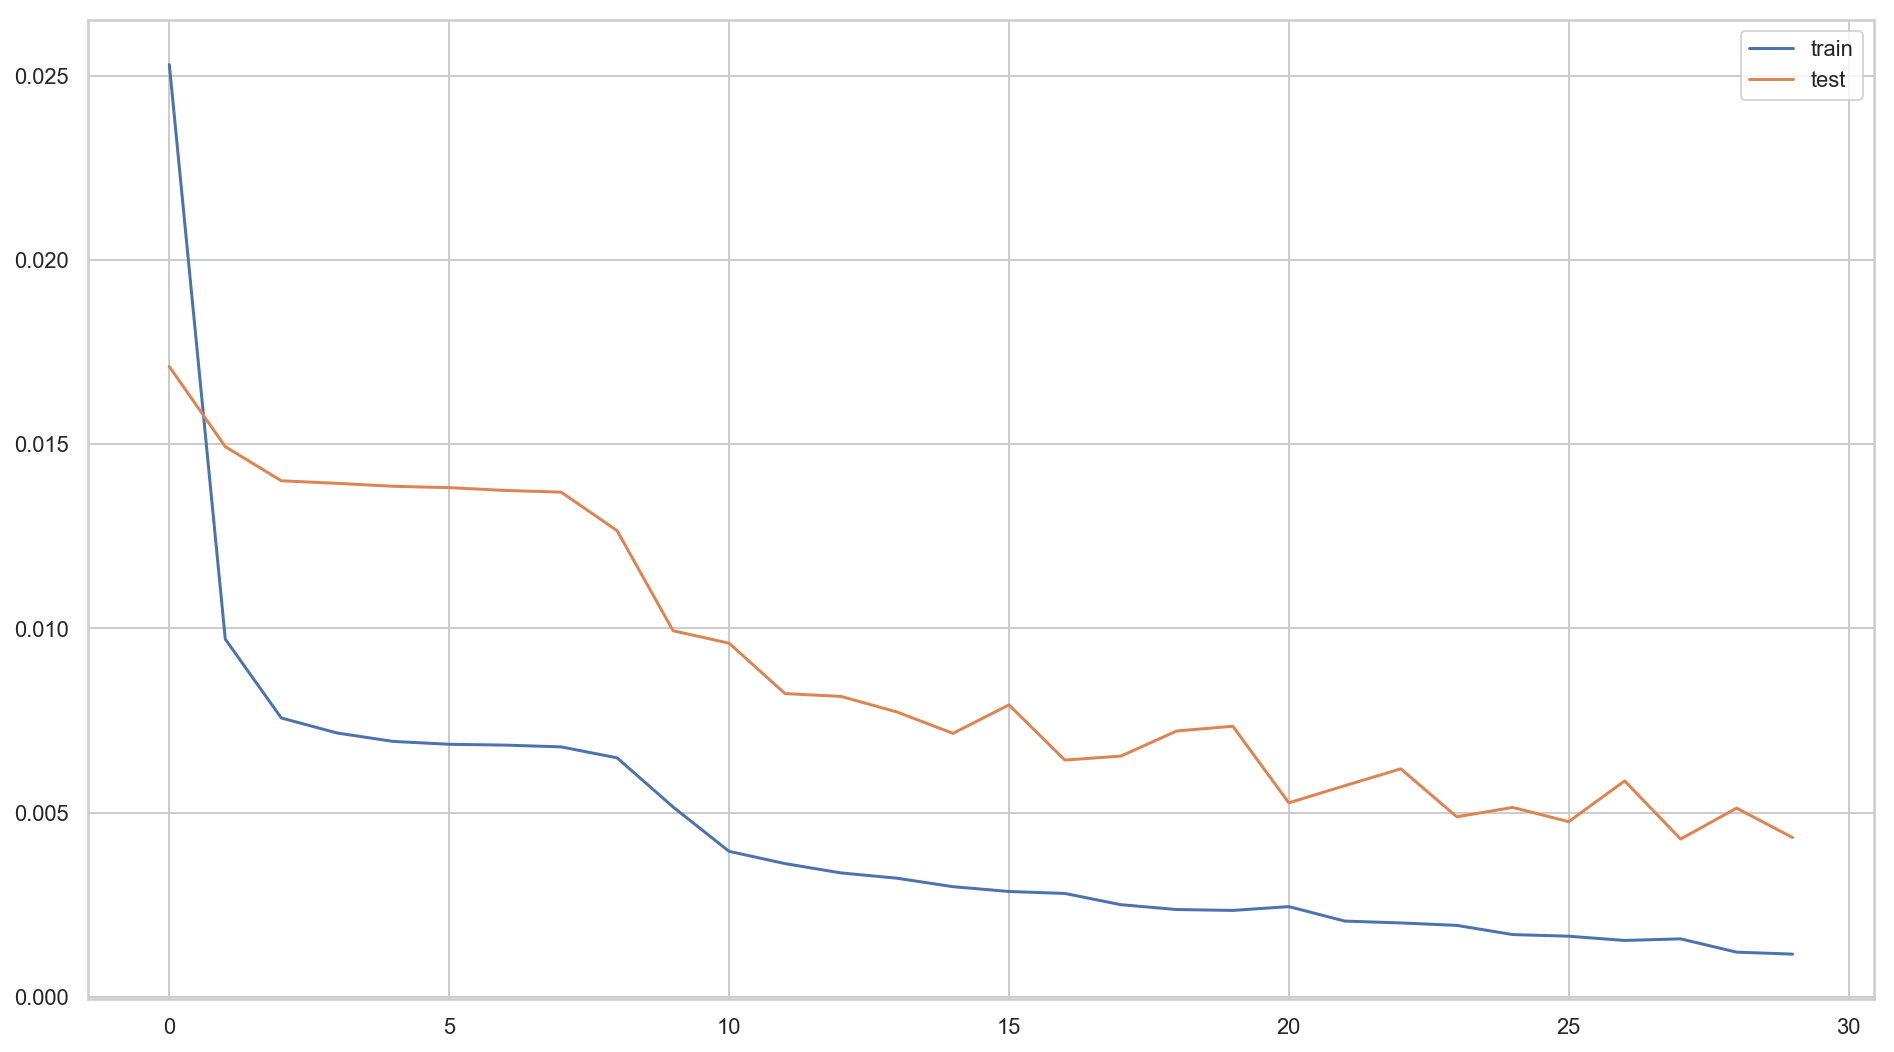

In [543]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Dropout(0.2))
#model.add(TimeDistributed(Dense(output_dim=1, activation='relu'))) # sequence labeling 
model.add(Dense(1, activation='linear'))
#rmsprop = RMSprop(lr=0.00001, rho=0.3, epsilon=None, decay=0.0)
#(lr=0.00001, rho=0.9, epsilon=1e-08)
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [544]:
# Evaluate the result
y_pred_test_lstm = model.predict(test_X)
y_train_pred_lstm = model.predict(train_X)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(train_y, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(test_y, y_pred_test_lstm)))

The R2 score on the Train set is:	0.946
The R2 score on the Test set is:	0.868


In [545]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(test_y, y_pred_test_lstm))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.042


In [603]:
# train_predict = model.predict(train_X)
# test_predict = model.predict(test_X)
# # invert predictions
# train_predict = scaler.inverse_transform(train_predict)
# Y_train = scaler.inverse_transform([train_y])
# test_predict = scaler.inverse_transform(test_predict)
# Y_test = scaler.inverse_transform([test_y])

In [604]:
# aa=[x for x in range(200)]
# plt.figure(figsize=(8,4))
# plt.plot(aa, test_y[0][:200], marker='.', label="actual")
# plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# # plt.tick_params(left=False, labelleft=True) #remove ticks
# plt.tight_layout()
# sns.despine(top=True)
# plt.subplots_adjust(left=0.07)
# plt.ylabel('Global_active_power', size=15)
# plt.xlabel('Time step', size=15)
# plt.legend(fontsize=15)
# plt.show();